# Libraries and credentials 


In [11]:
import praw
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import praw
import pandas as pd
from tqdm import tqdm
import time
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [12]:
reddit = praw.Reddit(client_id="7pR8Qo97G1mdWxoih5dZrw",
                     client_secret="7UnK7j1XM2Tntc23RroiRUGVEwzQNA",    
                     user_agent="script by u/Javiercitocn21")


# Reddit Scrapper

In [14]:


# Subreddit name
subreddit_name = 'mcgill'

# Lists to store the data
posts_data = []
comments_data = []

# Number of posts to retrieve in total
total_posts = 1000  # Adjust based on the expected total number of posts

# Counter for saved posts
posts_saved_count = 0

# Fetch posts from the entire subreddit
with tqdm(total=total_posts, desc="Fetching posts", unit="post", ncols=100) as pbar:
    for post in reddit.subreddit(subreddit_name).top(limit=total_posts):
        
        # Save post data
        posts_data.append({
            'post_id': post.id,
            'title': post.title,
            'author': post.author.name if post.author else 'unknown',
            'created_utc': post.created_utc,
            'num_comments': post.num_comments,
            'score': post.score,
            'selftext': post.selftext
        })

        # Save comments data
        post.comments.replace_more(limit=0)
        for comment in post.comments.list():
            comments_data.append({
                'post_id': post.id,
                'comment_id': comment.id,
                'author': comment.author.name if comment.author else 'unknown',
                'parent_id': comment.parent_id,
                'created_utc': comment.created_utc,
                'score': comment.score,
                'body': comment.body
            })

        # Increment the saved posts counter
        posts_saved_count += 1

        # Save data incrementally
        posts_df = pd.DataFrame(posts_data)
        comments_df = pd.DataFrame(comments_data)
        posts_df.to_csv('mcgill_posts.csv', index=False)
        comments_df.to_csv('mcgill_comments.csv', index=False)
        
        # Update the progress bar
        pbar.update(1)
        
        # Show progress in the console
        print(f"{posts_saved_count}/{total_posts} posts saved")

        # Add a small delay to comply with API rate limits
        time.sleep(1)

print(f"Data saved to mcgill_posts.csv and mcgill_comments.csv. Total posts saved: {posts_saved_count}")


Fetching posts:   0%|                                            | 1/1000 [00:02<38:39,  2.32s/post]

1/1000 posts saved


Fetching posts:   0%|                                            | 2/1000 [00:03<31:53,  1.92s/post]

2/1000 posts saved


Fetching posts:   0%|▏                                           | 3/1000 [00:05<27:31,  1.66s/post]

3/1000 posts saved


Fetching posts:   0%|▏                                           | 4/1000 [00:06<25:35,  1.54s/post]

4/1000 posts saved


Fetching posts:   0%|▏                                           | 5/1000 [00:07<24:15,  1.46s/post]

5/1000 posts saved


Fetching posts:   1%|▎                                           | 6/1000 [00:09<23:33,  1.42s/post]

6/1000 posts saved


Fetching posts:   1%|▎                                           | 7/1000 [00:10<23:00,  1.39s/post]

7/1000 posts saved


Fetching posts:   1%|▎                                           | 8/1000 [00:11<22:42,  1.37s/post]

8/1000 posts saved


Fetching posts:   1%|▍                                           | 9/1000 [00:13<22:19,  1.35s/post]

9/1000 posts saved


Fetching posts:   1%|▍                                          | 10/1000 [00:14<22:12,  1.35s/post]

10/1000 posts saved


Fetching posts:   1%|▍                                          | 11/1000 [00:15<21:37,  1.31s/post]

11/1000 posts saved


Fetching posts:   1%|▌                                          | 12/1000 [00:17<21:18,  1.29s/post]

12/1000 posts saved


Fetching posts:   1%|▌                                          | 13/1000 [00:18<21:30,  1.31s/post]

13/1000 posts saved


Fetching posts:   1%|▌                                          | 14/1000 [00:19<21:09,  1.29s/post]

14/1000 posts saved


Fetching posts:   2%|▋                                          | 15/1000 [00:21<21:27,  1.31s/post]

15/1000 posts saved


Fetching posts:   2%|▋                                          | 16/1000 [00:22<21:42,  1.32s/post]

16/1000 posts saved


Fetching posts:   2%|▋                                          | 17/1000 [00:25<32:25,  1.98s/post]

17/1000 posts saved


Fetching posts:   2%|▊                                          | 18/1000 [00:27<29:37,  1.81s/post]

18/1000 posts saved


Fetching posts:   2%|▊                                          | 19/1000 [00:28<26:50,  1.64s/post]

19/1000 posts saved


Fetching posts:   2%|▊                                          | 20/1000 [00:29<25:24,  1.56s/post]

20/1000 posts saved


Fetching posts:   2%|▉                                          | 21/1000 [00:31<25:11,  1.54s/post]

21/1000 posts saved


Fetching posts:   2%|▉                                          | 22/1000 [00:32<24:21,  1.49s/post]

22/1000 posts saved


Fetching posts:   2%|▉                                          | 23/1000 [00:34<23:27,  1.44s/post]

23/1000 posts saved


Fetching posts:   2%|█                                          | 24/1000 [00:35<22:35,  1.39s/post]

24/1000 posts saved


Fetching posts:   2%|█                                          | 25/1000 [00:36<22:01,  1.36s/post]

25/1000 posts saved


Fetching posts:   3%|█                                          | 26/1000 [00:38<21:51,  1.35s/post]

26/1000 posts saved


Fetching posts:   3%|█▏                                         | 27/1000 [00:39<22:58,  1.42s/post]

27/1000 posts saved


Fetching posts:   3%|█▏                                         | 28/1000 [00:41<23:31,  1.45s/post]

28/1000 posts saved


Fetching posts:   3%|█▏                                         | 29/1000 [00:42<23:04,  1.43s/post]

29/1000 posts saved


Fetching posts:   3%|█▎                                         | 30/1000 [00:43<22:43,  1.41s/post]

30/1000 posts saved


Fetching posts:   3%|█▎                                         | 31/1000 [00:45<22:09,  1.37s/post]

31/1000 posts saved


Fetching posts:   3%|█▍                                         | 32/1000 [00:46<22:20,  1.39s/post]

32/1000 posts saved


Fetching posts:   3%|█▍                                         | 33/1000 [00:47<21:52,  1.36s/post]

33/1000 posts saved


Fetching posts:   3%|█▍                                         | 34/1000 [00:49<21:15,  1.32s/post]

34/1000 posts saved


Fetching posts:   4%|█▌                                         | 35/1000 [00:50<22:08,  1.38s/post]

35/1000 posts saved


Fetching posts:   4%|█▌                                         | 36/1000 [00:51<21:32,  1.34s/post]

36/1000 posts saved


Fetching posts:   4%|█▌                                         | 37/1000 [00:53<21:22,  1.33s/post]

37/1000 posts saved


Fetching posts:   4%|█▋                                         | 38/1000 [00:56<32:29,  2.03s/post]

38/1000 posts saved


Fetching posts:   4%|█▋                                         | 39/1000 [00:58<29:11,  1.82s/post]

39/1000 posts saved


Fetching posts:   4%|█▋                                         | 40/1000 [00:59<27:24,  1.71s/post]

40/1000 posts saved


Fetching posts:   4%|█▊                                         | 41/1000 [01:01<26:00,  1.63s/post]

41/1000 posts saved


Fetching posts:   4%|█▊                                         | 42/1000 [01:02<24:23,  1.53s/post]

42/1000 posts saved


Fetching posts:   4%|█▊                                         | 43/1000 [01:04<29:40,  1.86s/post]

43/1000 posts saved


Fetching posts:   4%|█▉                                         | 44/1000 [01:06<26:54,  1.69s/post]

44/1000 posts saved


Fetching posts:   4%|█▉                                         | 45/1000 [01:07<24:51,  1.56s/post]

45/1000 posts saved


Fetching posts:   5%|█▉                                         | 46/1000 [01:08<23:31,  1.48s/post]

46/1000 posts saved


Fetching posts:   5%|██                                         | 47/1000 [01:10<25:19,  1.59s/post]

47/1000 posts saved


Fetching posts:   5%|██                                         | 48/1000 [01:12<24:47,  1.56s/post]

48/1000 posts saved


Fetching posts:   5%|██                                         | 49/1000 [01:13<23:10,  1.46s/post]

49/1000 posts saved


Fetching posts:   5%|██▏                                        | 50/1000 [01:14<22:38,  1.43s/post]

50/1000 posts saved


Fetching posts:   5%|██▏                                        | 51/1000 [01:16<22:34,  1.43s/post]

51/1000 posts saved


Fetching posts:   5%|██▏                                        | 52/1000 [01:17<21:33,  1.36s/post]

52/1000 posts saved


Fetching posts:   5%|██▎                                        | 53/1000 [01:18<22:25,  1.42s/post]

53/1000 posts saved


Fetching posts:   5%|██▎                                        | 54/1000 [01:20<21:21,  1.35s/post]

54/1000 posts saved


Fetching posts:   6%|██▎                                        | 55/1000 [01:21<21:07,  1.34s/post]

55/1000 posts saved


Fetching posts:   6%|██▍                                        | 56/1000 [01:22<20:49,  1.32s/post]

56/1000 posts saved


Fetching posts:   6%|██▍                                        | 57/1000 [01:24<22:03,  1.40s/post]

57/1000 posts saved


Fetching posts:   6%|██▍                                        | 58/1000 [01:25<21:07,  1.35s/post]

58/1000 posts saved


Fetching posts:   6%|██▌                                        | 59/1000 [01:26<20:52,  1.33s/post]

59/1000 posts saved


Fetching posts:   6%|██▌                                        | 60/1000 [01:29<24:53,  1.59s/post]

60/1000 posts saved


Fetching posts:   6%|██▌                                        | 61/1000 [01:31<27:34,  1.76s/post]

61/1000 posts saved


Fetching posts:   6%|██▋                                        | 62/1000 [01:32<25:23,  1.62s/post]

62/1000 posts saved


Fetching posts:   6%|██▋                                        | 63/1000 [01:33<23:53,  1.53s/post]

63/1000 posts saved


Fetching posts:   6%|██▊                                        | 64/1000 [01:35<23:08,  1.48s/post]

64/1000 posts saved


Fetching posts:   6%|██▊                                        | 65/1000 [01:36<22:01,  1.41s/post]

65/1000 posts saved


Fetching posts:   7%|██▊                                        | 66/1000 [01:37<21:14,  1.36s/post]

66/1000 posts saved


Fetching posts:   7%|██▉                                        | 67/1000 [01:39<21:35,  1.39s/post]

67/1000 posts saved


Fetching posts:   7%|██▉                                        | 68/1000 [01:40<22:12,  1.43s/post]

68/1000 posts saved


Fetching posts:   7%|██▉                                        | 69/1000 [01:41<21:43,  1.40s/post]

69/1000 posts saved


Fetching posts:   7%|███                                        | 70/1000 [01:44<25:54,  1.67s/post]

70/1000 posts saved


Fetching posts:   7%|███                                        | 71/1000 [01:45<23:48,  1.54s/post]

71/1000 posts saved


Fetching posts:   7%|███                                        | 72/1000 [01:46<22:30,  1.45s/post]

72/1000 posts saved


Fetching posts:   7%|███▏                                       | 73/1000 [01:48<21:29,  1.39s/post]

73/1000 posts saved


Fetching posts:   7%|███▏                                       | 74/1000 [01:49<21:15,  1.38s/post]

74/1000 posts saved


Fetching posts:   8%|███▏                                       | 75/1000 [01:50<20:23,  1.32s/post]

75/1000 posts saved


Fetching posts:   8%|███▎                                       | 76/1000 [01:51<20:05,  1.31s/post]

76/1000 posts saved


Fetching posts:   8%|███▎                                       | 77/1000 [01:53<20:25,  1.33s/post]

77/1000 posts saved


Fetching posts:   8%|███▎                                       | 78/1000 [01:54<20:19,  1.32s/post]

78/1000 posts saved


Fetching posts:   8%|███▍                                       | 79/1000 [01:55<20:07,  1.31s/post]

79/1000 posts saved


Fetching posts:   8%|███▍                                       | 80/1000 [01:57<20:04,  1.31s/post]

80/1000 posts saved


Fetching posts:   8%|███▍                                       | 81/1000 [01:58<20:02,  1.31s/post]

81/1000 posts saved


Fetching posts:   8%|███▌                                       | 82/1000 [01:59<20:54,  1.37s/post]

82/1000 posts saved


Fetching posts:   8%|███▌                                       | 83/1000 [02:01<20:21,  1.33s/post]

83/1000 posts saved


Fetching posts:   8%|███▌                                       | 84/1000 [02:02<19:47,  1.30s/post]

84/1000 posts saved


Fetching posts:   8%|███▋                                       | 85/1000 [02:03<19:27,  1.28s/post]

85/1000 posts saved


Fetching posts:   9%|███▋                                       | 86/1000 [02:04<19:40,  1.29s/post]

86/1000 posts saved


Fetching posts:   9%|███▋                                       | 87/1000 [02:06<20:05,  1.32s/post]

87/1000 posts saved


Fetching posts:   9%|███▊                                       | 88/1000 [02:07<20:20,  1.34s/post]

88/1000 posts saved


Fetching posts:   9%|███▊                                       | 89/1000 [02:08<19:58,  1.32s/post]

89/1000 posts saved


Fetching posts:   9%|███▊                                       | 90/1000 [02:10<20:21,  1.34s/post]

90/1000 posts saved


Fetching posts:   9%|███▉                                       | 91/1000 [02:12<23:14,  1.53s/post]

91/1000 posts saved


Fetching posts:   9%|███▉                                       | 92/1000 [02:13<22:38,  1.50s/post]

92/1000 posts saved


Fetching posts:   9%|███▉                                       | 93/1000 [02:15<21:54,  1.45s/post]

93/1000 posts saved


Fetching posts:   9%|████                                       | 94/1000 [02:16<21:43,  1.44s/post]

94/1000 posts saved


Fetching posts:  10%|████                                       | 95/1000 [02:17<21:06,  1.40s/post]

95/1000 posts saved


Fetching posts:  10%|████▏                                      | 96/1000 [02:19<20:29,  1.36s/post]

96/1000 posts saved


Fetching posts:  10%|████▏                                      | 97/1000 [02:20<20:17,  1.35s/post]

97/1000 posts saved


Fetching posts:  10%|████▏                                      | 98/1000 [02:21<19:58,  1.33s/post]

98/1000 posts saved


Fetching posts:  10%|████▎                                      | 99/1000 [02:22<19:42,  1.31s/post]

99/1000 posts saved


Fetching posts:  10%|████▏                                     | 100/1000 [02:24<20:07,  1.34s/post]

100/1000 posts saved


Fetching posts:  10%|████▏                                     | 101/1000 [02:27<27:54,  1.86s/post]

101/1000 posts saved


Fetching posts:  10%|████▎                                     | 102/1000 [02:28<25:36,  1.71s/post]

102/1000 posts saved


Fetching posts:  10%|████▎                                     | 103/1000 [02:30<23:40,  1.58s/post]

103/1000 posts saved


Fetching posts:  10%|████▎                                     | 104/1000 [02:31<23:39,  1.58s/post]

104/1000 posts saved


Fetching posts:  10%|████▍                                     | 105/1000 [02:33<22:28,  1.51s/post]

105/1000 posts saved


Fetching posts:  11%|████▍                                     | 106/1000 [02:34<21:30,  1.44s/post]

106/1000 posts saved


Fetching posts:  11%|████▍                                     | 107/1000 [02:35<21:07,  1.42s/post]

107/1000 posts saved


Fetching posts:  11%|████▌                                     | 108/1000 [02:37<20:58,  1.41s/post]

108/1000 posts saved


Fetching posts:  11%|████▌                                     | 109/1000 [02:38<20:22,  1.37s/post]

109/1000 posts saved


Fetching posts:  11%|████▌                                     | 110/1000 [02:39<20:04,  1.35s/post]

110/1000 posts saved


Fetching posts:  11%|████▋                                     | 111/1000 [02:40<19:58,  1.35s/post]

111/1000 posts saved


Fetching posts:  11%|████▋                                     | 112/1000 [02:42<19:29,  1.32s/post]

112/1000 posts saved


Fetching posts:  11%|████▋                                     | 113/1000 [02:43<19:35,  1.33s/post]

113/1000 posts saved


Fetching posts:  11%|████▊                                     | 114/1000 [02:45<21:59,  1.49s/post]

114/1000 posts saved


Fetching posts:  12%|████▊                                     | 115/1000 [02:46<22:04,  1.50s/post]

115/1000 posts saved


Fetching posts:  12%|████▊                                     | 116/1000 [02:48<21:22,  1.45s/post]

116/1000 posts saved


Fetching posts:  12%|████▉                                     | 117/1000 [02:49<20:23,  1.39s/post]

117/1000 posts saved


Fetching posts:  12%|████▉                                     | 118/1000 [02:50<20:18,  1.38s/post]

118/1000 posts saved


Fetching posts:  12%|████▉                                     | 119/1000 [02:52<19:56,  1.36s/post]

119/1000 posts saved


Fetching posts:  12%|█████                                     | 120/1000 [02:53<19:54,  1.36s/post]

120/1000 posts saved


Fetching posts:  12%|█████                                     | 121/1000 [02:54<20:05,  1.37s/post]

121/1000 posts saved


Fetching posts:  12%|█████                                     | 122/1000 [02:56<20:53,  1.43s/post]

122/1000 posts saved


Fetching posts:  12%|█████▏                                    | 123/1000 [02:57<20:17,  1.39s/post]

123/1000 posts saved


Fetching posts:  12%|█████▏                                    | 124/1000 [02:59<19:53,  1.36s/post]

124/1000 posts saved


Fetching posts:  12%|█████▎                                    | 125/1000 [03:00<19:48,  1.36s/post]

125/1000 posts saved


Fetching posts:  13%|█████▎                                    | 126/1000 [03:01<19:43,  1.35s/post]

126/1000 posts saved


Fetching posts:  13%|█████▎                                    | 127/1000 [03:03<19:44,  1.36s/post]

127/1000 posts saved


Fetching posts:  13%|█████▍                                    | 128/1000 [03:04<19:52,  1.37s/post]

128/1000 posts saved


Fetching posts:  13%|█████▍                                    | 129/1000 [03:05<19:55,  1.37s/post]

129/1000 posts saved


Fetching posts:  13%|█████▍                                    | 130/1000 [03:07<20:00,  1.38s/post]

130/1000 posts saved


Fetching posts:  13%|█████▌                                    | 131/1000 [03:08<19:36,  1.35s/post]

131/1000 posts saved


Fetching posts:  13%|█████▌                                    | 132/1000 [03:10<20:43,  1.43s/post]

132/1000 posts saved


Fetching posts:  13%|█████▌                                    | 133/1000 [03:11<20:30,  1.42s/post]

133/1000 posts saved


Fetching posts:  13%|█████▋                                    | 134/1000 [03:12<19:57,  1.38s/post]

134/1000 posts saved


Fetching posts:  14%|█████▋                                    | 135/1000 [03:14<19:50,  1.38s/post]

135/1000 posts saved


Fetching posts:  14%|█████▋                                    | 136/1000 [03:15<19:42,  1.37s/post]

136/1000 posts saved


Fetching posts:  14%|█████▊                                    | 137/1000 [03:17<20:31,  1.43s/post]

137/1000 posts saved


Fetching posts:  14%|█████▊                                    | 138/1000 [03:18<20:18,  1.41s/post]

138/1000 posts saved


Fetching posts:  14%|█████▊                                    | 139/1000 [03:20<20:55,  1.46s/post]

139/1000 posts saved


Fetching posts:  14%|█████▉                                    | 140/1000 [03:21<20:56,  1.46s/post]

140/1000 posts saved


Fetching posts:  14%|█████▉                                    | 141/1000 [03:22<20:09,  1.41s/post]

141/1000 posts saved


Fetching posts:  14%|█████▉                                    | 142/1000 [03:24<22:13,  1.55s/post]

142/1000 posts saved


Fetching posts:  14%|██████                                    | 143/1000 [03:26<21:58,  1.54s/post]

143/1000 posts saved


Fetching posts:  14%|██████                                    | 144/1000 [03:28<22:33,  1.58s/post]

144/1000 posts saved


Fetching posts:  14%|██████                                    | 145/1000 [03:29<21:19,  1.50s/post]

145/1000 posts saved


Fetching posts:  15%|██████▏                                   | 146/1000 [03:30<20:39,  1.45s/post]

146/1000 posts saved


Fetching posts:  15%|██████▏                                   | 147/1000 [03:32<20:17,  1.43s/post]

147/1000 posts saved


Fetching posts:  15%|██████▏                                   | 148/1000 [03:33<19:36,  1.38s/post]

148/1000 posts saved


Fetching posts:  15%|██████▎                                   | 149/1000 [03:34<19:51,  1.40s/post]

149/1000 posts saved


Fetching posts:  15%|██████▎                                   | 150/1000 [03:36<20:12,  1.43s/post]

150/1000 posts saved


Fetching posts:  15%|██████▎                                   | 151/1000 [03:37<20:00,  1.41s/post]

151/1000 posts saved


Fetching posts:  15%|██████▍                                   | 152/1000 [03:38<19:21,  1.37s/post]

152/1000 posts saved


Fetching posts:  15%|██████▍                                   | 153/1000 [03:40<19:21,  1.37s/post]

153/1000 posts saved


Fetching posts:  15%|██████▍                                   | 154/1000 [03:41<20:44,  1.47s/post]

154/1000 posts saved


Fetching posts:  16%|██████▌                                   | 155/1000 [03:43<20:12,  1.44s/post]

155/1000 posts saved


Fetching posts:  16%|██████▌                                   | 156/1000 [03:44<19:27,  1.38s/post]

156/1000 posts saved


Fetching posts:  16%|██████▌                                   | 157/1000 [03:45<19:07,  1.36s/post]

157/1000 posts saved


Fetching posts:  16%|██████▋                                   | 158/1000 [03:47<19:15,  1.37s/post]

158/1000 posts saved


Fetching posts:  16%|██████▋                                   | 159/1000 [03:48<18:48,  1.34s/post]

159/1000 posts saved


Fetching posts:  16%|██████▋                                   | 160/1000 [03:49<18:33,  1.33s/post]

160/1000 posts saved


Fetching posts:  16%|██████▊                                   | 161/1000 [03:51<19:20,  1.38s/post]

161/1000 posts saved


Fetching posts:  16%|██████▊                                   | 162/1000 [03:52<18:58,  1.36s/post]

162/1000 posts saved


Fetching posts:  16%|██████▊                                   | 163/1000 [03:54<19:03,  1.37s/post]

163/1000 posts saved


Fetching posts:  16%|██████▉                                   | 164/1000 [03:55<18:35,  1.33s/post]

164/1000 posts saved


Fetching posts:  16%|██████▉                                   | 165/1000 [03:56<18:41,  1.34s/post]

165/1000 posts saved


Fetching posts:  17%|██████▉                                   | 166/1000 [03:57<18:27,  1.33s/post]

166/1000 posts saved


Fetching posts:  17%|███████                                   | 167/1000 [03:59<18:10,  1.31s/post]

167/1000 posts saved


Fetching posts:  17%|███████                                   | 168/1000 [04:00<18:21,  1.32s/post]

168/1000 posts saved


Fetching posts:  17%|███████                                   | 169/1000 [04:02<21:40,  1.57s/post]

169/1000 posts saved


Fetching posts:  17%|███████▏                                  | 170/1000 [04:04<21:53,  1.58s/post]

170/1000 posts saved


Fetching posts:  17%|███████▏                                  | 171/1000 [04:05<20:52,  1.51s/post]

171/1000 posts saved


Fetching posts:  17%|███████▏                                  | 172/1000 [04:07<20:10,  1.46s/post]

172/1000 posts saved


Fetching posts:  17%|███████▎                                  | 173/1000 [04:08<19:32,  1.42s/post]

173/1000 posts saved


Fetching posts:  17%|███████▎                                  | 174/1000 [04:09<19:12,  1.40s/post]

174/1000 posts saved


Fetching posts:  18%|███████▎                                  | 175/1000 [04:10<18:38,  1.36s/post]

175/1000 posts saved


Fetching posts:  18%|███████▍                                  | 176/1000 [04:12<19:17,  1.40s/post]

176/1000 posts saved


Fetching posts:  18%|███████▍                                  | 177/1000 [04:13<18:44,  1.37s/post]

177/1000 posts saved


Fetching posts:  18%|███████▍                                  | 178/1000 [04:15<18:22,  1.34s/post]

178/1000 posts saved


Fetching posts:  18%|███████▌                                  | 179/1000 [04:16<18:48,  1.37s/post]

179/1000 posts saved


Fetching posts:  18%|███████▌                                  | 180/1000 [04:17<18:31,  1.36s/post]

180/1000 posts saved


Fetching posts:  18%|███████▌                                  | 181/1000 [04:19<18:37,  1.36s/post]

181/1000 posts saved


Fetching posts:  18%|███████▋                                  | 182/1000 [04:20<19:03,  1.40s/post]

182/1000 posts saved


Fetching posts:  18%|███████▋                                  | 183/1000 [04:21<18:46,  1.38s/post]

183/1000 posts saved


Fetching posts:  18%|███████▋                                  | 184/1000 [04:23<18:27,  1.36s/post]

184/1000 posts saved


Fetching posts:  18%|███████▊                                  | 185/1000 [04:24<18:39,  1.37s/post]

185/1000 posts saved


Fetching posts:  19%|███████▊                                  | 186/1000 [04:26<20:21,  1.50s/post]

186/1000 posts saved


Fetching posts:  19%|███████▊                                  | 187/1000 [04:27<19:36,  1.45s/post]

187/1000 posts saved


Fetching posts:  19%|███████▉                                  | 188/1000 [04:29<19:47,  1.46s/post]

188/1000 posts saved


Fetching posts:  19%|███████▉                                  | 189/1000 [04:30<19:20,  1.43s/post]

189/1000 posts saved


Fetching posts:  19%|███████▉                                  | 190/1000 [04:32<18:53,  1.40s/post]

190/1000 posts saved


Fetching posts:  19%|████████                                  | 191/1000 [04:33<18:25,  1.37s/post]

191/1000 posts saved


Fetching posts:  19%|████████                                  | 192/1000 [04:34<17:58,  1.33s/post]

192/1000 posts saved


Fetching posts:  19%|████████                                  | 193/1000 [04:35<17:35,  1.31s/post]

193/1000 posts saved


Fetching posts:  19%|████████▏                                 | 194/1000 [04:37<19:31,  1.45s/post]

194/1000 posts saved


Fetching posts:  20%|████████▏                                 | 195/1000 [04:38<18:57,  1.41s/post]

195/1000 posts saved


Fetching posts:  20%|████████▏                                 | 196/1000 [04:40<18:29,  1.38s/post]

196/1000 posts saved


Fetching posts:  20%|████████▎                                 | 197/1000 [04:41<18:01,  1.35s/post]

197/1000 posts saved


Fetching posts:  20%|████████▎                                 | 198/1000 [04:42<18:15,  1.37s/post]

198/1000 posts saved


Fetching posts:  20%|████████▎                                 | 199/1000 [04:44<19:05,  1.43s/post]

199/1000 posts saved


Fetching posts:  20%|████████▍                                 | 200/1000 [04:45<18:28,  1.39s/post]

200/1000 posts saved


Fetching posts:  20%|████████▍                                 | 201/1000 [04:48<22:56,  1.72s/post]

201/1000 posts saved


Fetching posts:  20%|████████▍                                 | 202/1000 [04:49<21:27,  1.61s/post]

202/1000 posts saved


Fetching posts:  20%|████████▌                                 | 203/1000 [04:50<20:07,  1.52s/post]

203/1000 posts saved


Fetching posts:  20%|████████▌                                 | 204/1000 [04:52<19:34,  1.48s/post]

204/1000 posts saved


Fetching posts:  20%|████████▌                                 | 205/1000 [04:53<18:59,  1.43s/post]

205/1000 posts saved


Fetching posts:  21%|████████▋                                 | 206/1000 [04:54<18:38,  1.41s/post]

206/1000 posts saved


Fetching posts:  21%|████████▋                                 | 207/1000 [04:56<17:58,  1.36s/post]

207/1000 posts saved


Fetching posts:  21%|████████▋                                 | 208/1000 [04:57<17:50,  1.35s/post]

208/1000 posts saved


Fetching posts:  21%|████████▊                                 | 209/1000 [04:58<17:29,  1.33s/post]

209/1000 posts saved


Fetching posts:  21%|████████▊                                 | 210/1000 [05:00<18:28,  1.40s/post]

210/1000 posts saved


Fetching posts:  21%|████████▊                                 | 211/1000 [05:01<18:00,  1.37s/post]

211/1000 posts saved


Fetching posts:  21%|████████▉                                 | 212/1000 [05:03<18:21,  1.40s/post]

212/1000 posts saved


Fetching posts:  21%|████████▉                                 | 213/1000 [05:05<22:03,  1.68s/post]

213/1000 posts saved


Fetching posts:  21%|████████▉                                 | 214/1000 [05:06<20:49,  1.59s/post]

214/1000 posts saved


Fetching posts:  22%|█████████                                 | 215/1000 [05:08<19:48,  1.51s/post]

215/1000 posts saved


Fetching posts:  22%|█████████                                 | 216/1000 [05:09<18:51,  1.44s/post]

216/1000 posts saved


Fetching posts:  22%|█████████                                 | 217/1000 [05:10<18:23,  1.41s/post]

217/1000 posts saved


Fetching posts:  22%|█████████▏                                | 218/1000 [05:14<26:14,  2.01s/post]

218/1000 posts saved


Fetching posts:  22%|█████████▏                                | 219/1000 [05:15<23:22,  1.80s/post]

219/1000 posts saved


Fetching posts:  22%|█████████▏                                | 220/1000 [05:16<21:24,  1.65s/post]

220/1000 posts saved


Fetching posts:  22%|█████████▎                                | 221/1000 [05:18<20:05,  1.55s/post]

221/1000 posts saved


Fetching posts:  22%|█████████▎                                | 222/1000 [05:19<19:54,  1.54s/post]

222/1000 posts saved


Fetching posts:  22%|█████████▎                                | 223/1000 [05:21<19:09,  1.48s/post]

223/1000 posts saved


Fetching posts:  22%|█████████▍                                | 224/1000 [05:22<18:43,  1.45s/post]

224/1000 posts saved


Fetching posts:  22%|█████████▍                                | 225/1000 [05:23<18:28,  1.43s/post]

225/1000 posts saved


Fetching posts:  23%|█████████▍                                | 226/1000 [05:25<18:39,  1.45s/post]

226/1000 posts saved


Fetching posts:  23%|█████████▌                                | 227/1000 [05:26<19:23,  1.51s/post]

227/1000 posts saved


Fetching posts:  23%|█████████▌                                | 228/1000 [05:28<19:01,  1.48s/post]

228/1000 posts saved


Fetching posts:  23%|█████████▌                                | 229/1000 [05:29<18:42,  1.46s/post]

229/1000 posts saved


Fetching posts:  23%|█████████▋                                | 230/1000 [05:30<17:51,  1.39s/post]

230/1000 posts saved


Fetching posts:  23%|█████████▋                                | 231/1000 [05:32<19:05,  1.49s/post]

231/1000 posts saved


Fetching posts:  23%|█████████▋                                | 232/1000 [05:34<18:50,  1.47s/post]

232/1000 posts saved


Fetching posts:  23%|█████████▊                                | 233/1000 [05:35<18:26,  1.44s/post]

233/1000 posts saved


Fetching posts:  23%|█████████▊                                | 234/1000 [05:36<18:17,  1.43s/post]

234/1000 posts saved


Fetching posts:  24%|█████████▊                                | 235/1000 [05:38<18:04,  1.42s/post]

235/1000 posts saved


Fetching posts:  24%|█████████▉                                | 236/1000 [05:40<19:28,  1.53s/post]

236/1000 posts saved


Fetching posts:  24%|█████████▉                                | 237/1000 [05:41<18:50,  1.48s/post]

237/1000 posts saved


Fetching posts:  24%|█████████▉                                | 238/1000 [05:42<18:00,  1.42s/post]

238/1000 posts saved


Fetching posts:  24%|██████████                                | 239/1000 [05:44<17:43,  1.40s/post]

239/1000 posts saved


Fetching posts:  24%|██████████                                | 240/1000 [05:45<17:28,  1.38s/post]

240/1000 posts saved


Fetching posts:  24%|██████████                                | 241/1000 [05:46<17:12,  1.36s/post]

241/1000 posts saved


Fetching posts:  24%|██████████▏                               | 242/1000 [05:48<16:56,  1.34s/post]

242/1000 posts saved


Fetching posts:  24%|██████████▏                               | 243/1000 [05:49<17:17,  1.37s/post]

243/1000 posts saved


Fetching posts:  24%|██████████▏                               | 244/1000 [05:50<17:22,  1.38s/post]

244/1000 posts saved


Fetching posts:  24%|██████████▎                               | 245/1000 [05:52<17:16,  1.37s/post]

245/1000 posts saved


Fetching posts:  25%|██████████▎                               | 246/1000 [05:53<17:23,  1.38s/post]

246/1000 posts saved


Fetching posts:  25%|██████████▎                               | 247/1000 [05:55<17:40,  1.41s/post]

247/1000 posts saved


Fetching posts:  25%|██████████▍                               | 248/1000 [05:56<17:40,  1.41s/post]

248/1000 posts saved


Fetching posts:  25%|██████████▍                               | 249/1000 [05:57<17:29,  1.40s/post]

249/1000 posts saved


Fetching posts:  25%|██████████▌                               | 250/1000 [05:59<17:46,  1.42s/post]

250/1000 posts saved


Fetching posts:  25%|██████████▌                               | 251/1000 [06:00<17:29,  1.40s/post]

251/1000 posts saved


Fetching posts:  25%|██████████▌                               | 252/1000 [06:01<17:05,  1.37s/post]

252/1000 posts saved


Fetching posts:  25%|██████████▋                               | 253/1000 [06:03<17:32,  1.41s/post]

253/1000 posts saved


Fetching posts:  25%|██████████▋                               | 254/1000 [06:04<17:13,  1.39s/post]

254/1000 posts saved


Fetching posts:  26%|██████████▋                               | 255/1000 [06:06<17:17,  1.39s/post]

255/1000 posts saved


Fetching posts:  26%|██████████▊                               | 256/1000 [06:08<19:05,  1.54s/post]

256/1000 posts saved


Fetching posts:  26%|██████████▊                               | 257/1000 [06:10<20:33,  1.66s/post]

257/1000 posts saved


Fetching posts:  26%|██████████▊                               | 258/1000 [06:11<19:18,  1.56s/post]

258/1000 posts saved


Fetching posts:  26%|██████████▉                               | 259/1000 [06:12<18:54,  1.53s/post]

259/1000 posts saved


Fetching posts:  26%|██████████▉                               | 260/1000 [06:14<18:49,  1.53s/post]

260/1000 posts saved


Fetching posts:  26%|██████████▉                               | 261/1000 [06:18<27:16,  2.22s/post]

261/1000 posts saved


Fetching posts:  26%|███████████                               | 262/1000 [06:20<25:50,  2.10s/post]

262/1000 posts saved


Fetching posts:  26%|███████████                               | 263/1000 [06:21<23:20,  1.90s/post]

263/1000 posts saved


Fetching posts:  26%|███████████                               | 264/1000 [06:22<21:33,  1.76s/post]

264/1000 posts saved


Fetching posts:  26%|███████████▏                              | 265/1000 [06:24<20:10,  1.65s/post]

265/1000 posts saved


Fetching posts:  27%|███████████▏                              | 266/1000 [06:25<19:13,  1.57s/post]

266/1000 posts saved


Fetching posts:  27%|███████████▏                              | 267/1000 [06:27<18:46,  1.54s/post]

267/1000 posts saved


Fetching posts:  27%|███████████▎                              | 268/1000 [06:28<18:03,  1.48s/post]

268/1000 posts saved


Fetching posts:  27%|███████████▎                              | 269/1000 [06:29<17:53,  1.47s/post]

269/1000 posts saved


Fetching posts:  27%|███████████▎                              | 270/1000 [06:31<18:11,  1.49s/post]

270/1000 posts saved


Fetching posts:  27%|███████████▍                              | 271/1000 [06:32<18:11,  1.50s/post]

271/1000 posts saved


Fetching posts:  27%|███████████▍                              | 272/1000 [06:34<17:32,  1.45s/post]

272/1000 posts saved


Fetching posts:  27%|███████████▍                              | 273/1000 [06:35<17:35,  1.45s/post]

273/1000 posts saved


Fetching posts:  27%|███████████▌                              | 274/1000 [06:37<17:02,  1.41s/post]

274/1000 posts saved


Fetching posts:  28%|███████████▌                              | 275/1000 [06:38<16:53,  1.40s/post]

275/1000 posts saved


Fetching posts:  28%|███████████▌                              | 276/1000 [06:39<17:14,  1.43s/post]

276/1000 posts saved


Fetching posts:  28%|███████████▋                              | 277/1000 [06:41<17:17,  1.44s/post]

277/1000 posts saved


Fetching posts:  28%|███████████▋                              | 278/1000 [06:42<16:50,  1.40s/post]

278/1000 posts saved


Fetching posts:  28%|███████████▋                              | 279/1000 [06:44<16:38,  1.39s/post]

279/1000 posts saved


Fetching posts:  28%|███████████▊                              | 280/1000 [06:45<16:24,  1.37s/post]

280/1000 posts saved


Fetching posts:  28%|███████████▊                              | 281/1000 [06:46<16:02,  1.34s/post]

281/1000 posts saved


Fetching posts:  28%|███████████▊                              | 282/1000 [06:48<16:38,  1.39s/post]

282/1000 posts saved


Fetching posts:  28%|███████████▉                              | 283/1000 [06:49<16:25,  1.37s/post]

283/1000 posts saved


Fetching posts:  28%|███████████▉                              | 284/1000 [06:51<19:39,  1.65s/post]

284/1000 posts saved


Fetching posts:  28%|███████████▉                              | 285/1000 [06:53<18:50,  1.58s/post]

285/1000 posts saved


Fetching posts:  29%|████████████                              | 286/1000 [06:54<17:38,  1.48s/post]

286/1000 posts saved


Fetching posts:  29%|████████████                              | 287/1000 [06:55<17:29,  1.47s/post]

287/1000 posts saved


Fetching posts:  29%|████████████                              | 288/1000 [06:57<16:58,  1.43s/post]

288/1000 posts saved


Fetching posts:  29%|████████████▏                             | 289/1000 [06:58<17:24,  1.47s/post]

289/1000 posts saved


Fetching posts:  29%|████████████▏                             | 290/1000 [07:00<16:47,  1.42s/post]

290/1000 posts saved


Fetching posts:  29%|████████████▏                             | 291/1000 [07:01<16:41,  1.41s/post]

291/1000 posts saved


Fetching posts:  29%|████████████▎                             | 292/1000 [07:02<16:44,  1.42s/post]

292/1000 posts saved


Fetching posts:  29%|████████████▎                             | 293/1000 [07:04<16:49,  1.43s/post]

293/1000 posts saved


Fetching posts:  29%|████████████▎                             | 294/1000 [07:05<17:08,  1.46s/post]

294/1000 posts saved


Fetching posts:  30%|████████████▍                             | 295/1000 [07:07<18:01,  1.53s/post]

295/1000 posts saved


Fetching posts:  30%|████████████▍                             | 296/1000 [07:08<17:24,  1.48s/post]

296/1000 posts saved


Fetching posts:  30%|████████████▍                             | 297/1000 [07:10<16:42,  1.43s/post]

297/1000 posts saved


Fetching posts:  30%|████████████▌                             | 298/1000 [07:12<19:35,  1.67s/post]

298/1000 posts saved


Fetching posts:  30%|████████████▌                             | 299/1000 [07:14<19:09,  1.64s/post]

299/1000 posts saved


Fetching posts:  30%|████████████▌                             | 300/1000 [07:15<18:12,  1.56s/post]

300/1000 posts saved


Fetching posts:  30%|████████████▋                             | 301/1000 [07:18<23:09,  1.99s/post]

301/1000 posts saved


Fetching posts:  30%|████████████▋                             | 302/1000 [07:19<20:41,  1.78s/post]

302/1000 posts saved


Fetching posts:  30%|████████████▋                             | 303/1000 [07:21<20:09,  1.74s/post]

303/1000 posts saved


Fetching posts:  30%|████████████▊                             | 304/1000 [07:22<19:00,  1.64s/post]

304/1000 posts saved


Fetching posts:  30%|████████████▊                             | 305/1000 [07:24<18:21,  1.58s/post]

305/1000 posts saved


Fetching posts:  31%|████████████▊                             | 306/1000 [07:25<17:36,  1.52s/post]

306/1000 posts saved


Fetching posts:  31%|████████████▉                             | 307/1000 [07:27<18:00,  1.56s/post]

307/1000 posts saved


Fetching posts:  31%|████████████▉                             | 308/1000 [07:28<17:27,  1.51s/post]

308/1000 posts saved


Fetching posts:  31%|████████████▉                             | 309/1000 [07:30<17:01,  1.48s/post]

309/1000 posts saved


Fetching posts:  31%|█████████████                             | 310/1000 [07:31<16:54,  1.47s/post]

310/1000 posts saved


Fetching posts:  31%|█████████████                             | 311/1000 [07:32<16:47,  1.46s/post]

311/1000 posts saved


Fetching posts:  31%|█████████████                             | 312/1000 [07:34<17:12,  1.50s/post]

312/1000 posts saved


Fetching posts:  31%|█████████████▏                            | 313/1000 [07:36<17:55,  1.57s/post]

313/1000 posts saved


Fetching posts:  31%|█████████████▏                            | 314/1000 [07:37<16:59,  1.49s/post]

314/1000 posts saved


Fetching posts:  32%|█████████████▏                            | 315/1000 [07:39<19:19,  1.69s/post]

315/1000 posts saved


Fetching posts:  32%|█████████████▎                            | 316/1000 [07:41<19:04,  1.67s/post]

316/1000 posts saved


Fetching posts:  32%|█████████████▎                            | 317/1000 [07:42<18:02,  1.59s/post]

317/1000 posts saved


Fetching posts:  32%|█████████████▎                            | 318/1000 [07:44<16:51,  1.48s/post]

318/1000 posts saved


Fetching posts:  32%|█████████████▍                            | 319/1000 [07:45<16:48,  1.48s/post]

319/1000 posts saved


Fetching posts:  32%|█████████████▍                            | 320/1000 [07:46<16:05,  1.42s/post]

320/1000 posts saved


Fetching posts:  32%|█████████████▍                            | 321/1000 [07:48<15:54,  1.41s/post]

321/1000 posts saved


Fetching posts:  32%|█████████████▌                            | 322/1000 [07:49<15:59,  1.41s/post]

322/1000 posts saved


Fetching posts:  32%|█████████████▌                            | 323/1000 [07:50<15:59,  1.42s/post]

323/1000 posts saved


Fetching posts:  32%|█████████████▌                            | 324/1000 [07:52<15:26,  1.37s/post]

324/1000 posts saved


Fetching posts:  32%|█████████████▋                            | 325/1000 [07:53<15:36,  1.39s/post]

325/1000 posts saved


Fetching posts:  33%|█████████████▋                            | 326/1000 [07:55<15:46,  1.40s/post]

326/1000 posts saved


Fetching posts:  33%|█████████████▋                            | 327/1000 [07:56<15:49,  1.41s/post]

327/1000 posts saved


Fetching posts:  33%|█████████████▊                            | 328/1000 [07:58<16:34,  1.48s/post]

328/1000 posts saved


Fetching posts:  33%|█████████████▊                            | 329/1000 [07:59<16:27,  1.47s/post]

329/1000 posts saved


Fetching posts:  33%|█████████████▊                            | 330/1000 [08:01<16:10,  1.45s/post]

330/1000 posts saved


Fetching posts:  33%|█████████████▉                            | 331/1000 [08:02<16:03,  1.44s/post]

331/1000 posts saved


Fetching posts:  33%|█████████████▉                            | 332/1000 [08:03<15:38,  1.40s/post]

332/1000 posts saved


Fetching posts:  33%|█████████████▉                            | 333/1000 [08:05<15:13,  1.37s/post]

333/1000 posts saved


Fetching posts:  33%|██████████████                            | 334/1000 [08:06<14:52,  1.34s/post]

334/1000 posts saved


Fetching posts:  34%|██████████████                            | 335/1000 [08:07<15:06,  1.36s/post]

335/1000 posts saved


Fetching posts:  34%|██████████████                            | 336/1000 [08:09<14:59,  1.35s/post]

336/1000 posts saved


Fetching posts:  34%|██████████████▏                           | 337/1000 [08:10<15:04,  1.36s/post]

337/1000 posts saved


Fetching posts:  34%|██████████████▏                           | 338/1000 [08:11<15:12,  1.38s/post]

338/1000 posts saved


Fetching posts:  34%|██████████████▏                           | 339/1000 [08:13<15:41,  1.42s/post]

339/1000 posts saved


Fetching posts:  34%|██████████████▎                           | 340/1000 [08:14<15:57,  1.45s/post]

340/1000 posts saved


Fetching posts:  34%|██████████████▎                           | 341/1000 [08:16<15:29,  1.41s/post]

341/1000 posts saved


Fetching posts:  34%|██████████████▎                           | 342/1000 [08:17<15:34,  1.42s/post]

342/1000 posts saved


Fetching posts:  34%|██████████████▍                           | 343/1000 [08:19<15:28,  1.41s/post]

343/1000 posts saved


Fetching posts:  34%|██████████████▍                           | 344/1000 [08:20<15:11,  1.39s/post]

344/1000 posts saved


Fetching posts:  34%|██████████████▍                           | 345/1000 [08:21<14:49,  1.36s/post]

345/1000 posts saved


Fetching posts:  35%|██████████████▌                           | 346/1000 [08:23<15:20,  1.41s/post]

346/1000 posts saved


Fetching posts:  35%|██████████████▌                           | 347/1000 [08:24<14:53,  1.37s/post]

347/1000 posts saved


Fetching posts:  35%|██████████████▌                           | 348/1000 [08:26<16:48,  1.55s/post]

348/1000 posts saved


Fetching posts:  35%|██████████████▋                           | 349/1000 [08:27<16:25,  1.51s/post]

349/1000 posts saved


Fetching posts:  35%|██████████████▋                           | 350/1000 [08:29<15:42,  1.45s/post]

350/1000 posts saved


Fetching posts:  35%|██████████████▋                           | 351/1000 [08:30<15:37,  1.44s/post]

351/1000 posts saved


Fetching posts:  35%|██████████████▊                           | 352/1000 [08:32<16:06,  1.49s/post]

352/1000 posts saved


Fetching posts:  35%|██████████████▊                           | 353/1000 [08:33<16:24,  1.52s/post]

353/1000 posts saved


Fetching posts:  35%|██████████████▊                           | 354/1000 [08:35<16:06,  1.50s/post]

354/1000 posts saved


Fetching posts:  36%|██████████████▉                           | 355/1000 [08:36<16:01,  1.49s/post]

355/1000 posts saved


Fetching posts:  36%|██████████████▉                           | 356/1000 [08:38<15:43,  1.46s/post]

356/1000 posts saved


Fetching posts:  36%|██████████████▉                           | 357/1000 [08:39<15:27,  1.44s/post]

357/1000 posts saved


Fetching posts:  36%|███████████████                           | 358/1000 [08:40<15:20,  1.43s/post]

358/1000 posts saved


Fetching posts:  36%|███████████████                           | 359/1000 [08:42<15:05,  1.41s/post]

359/1000 posts saved


Fetching posts:  36%|███████████████                           | 360/1000 [08:43<14:50,  1.39s/post]

360/1000 posts saved


Fetching posts:  36%|███████████████▏                          | 361/1000 [08:45<14:39,  1.38s/post]

361/1000 posts saved


Fetching posts:  36%|███████████████▏                          | 362/1000 [08:46<14:52,  1.40s/post]

362/1000 posts saved


Fetching posts:  36%|███████████████▏                          | 363/1000 [08:48<17:07,  1.61s/post]

363/1000 posts saved


Fetching posts:  36%|███████████████▎                          | 364/1000 [08:49<16:19,  1.54s/post]

364/1000 posts saved


Fetching posts:  36%|███████████████▎                          | 365/1000 [08:51<17:48,  1.68s/post]

365/1000 posts saved


Fetching posts:  37%|███████████████▎                          | 366/1000 [08:53<16:56,  1.60s/post]

366/1000 posts saved


Fetching posts:  37%|███████████████▍                          | 367/1000 [08:54<16:25,  1.56s/post]

367/1000 posts saved


Fetching posts:  37%|███████████████▍                          | 368/1000 [08:56<15:34,  1.48s/post]

368/1000 posts saved


Fetching posts:  37%|███████████████▍                          | 369/1000 [08:57<15:14,  1.45s/post]

369/1000 posts saved


Fetching posts:  37%|███████████████▌                          | 370/1000 [08:58<15:12,  1.45s/post]

370/1000 posts saved


Fetching posts:  37%|███████████████▌                          | 371/1000 [09:00<14:40,  1.40s/post]

371/1000 posts saved


Fetching posts:  37%|███████████████▌                          | 372/1000 [09:01<14:19,  1.37s/post]

372/1000 posts saved


Fetching posts:  37%|███████████████▋                          | 373/1000 [09:02<14:19,  1.37s/post]

373/1000 posts saved


Fetching posts:  37%|███████████████▋                          | 374/1000 [09:04<15:39,  1.50s/post]

374/1000 posts saved


Fetching posts:  38%|███████████████▊                          | 375/1000 [09:06<15:22,  1.48s/post]

375/1000 posts saved


Fetching posts:  38%|███████████████▊                          | 376/1000 [09:07<15:18,  1.47s/post]

376/1000 posts saved


Fetching posts:  38%|███████████████▊                          | 377/1000 [09:08<14:47,  1.42s/post]

377/1000 posts saved


Fetching posts:  38%|███████████████▉                          | 378/1000 [09:10<14:40,  1.41s/post]

378/1000 posts saved


Fetching posts:  38%|███████████████▉                          | 379/1000 [09:11<14:41,  1.42s/post]

379/1000 posts saved


Fetching posts:  38%|███████████████▉                          | 380/1000 [09:13<14:19,  1.39s/post]

380/1000 posts saved


Fetching posts:  38%|████████████████                          | 381/1000 [09:14<14:13,  1.38s/post]

381/1000 posts saved


Fetching posts:  38%|████████████████                          | 382/1000 [09:15<14:15,  1.38s/post]

382/1000 posts saved


Fetching posts:  38%|████████████████                          | 383/1000 [09:17<14:26,  1.40s/post]

383/1000 posts saved


Fetching posts:  38%|████████████████▏                         | 384/1000 [09:18<14:05,  1.37s/post]

384/1000 posts saved


Fetching posts:  38%|████████████████▏                         | 385/1000 [09:19<14:06,  1.38s/post]

385/1000 posts saved


Fetching posts:  39%|████████████████▏                         | 386/1000 [09:21<13:52,  1.36s/post]

386/1000 posts saved


Fetching posts:  39%|████████████████▎                         | 387/1000 [09:22<14:28,  1.42s/post]

387/1000 posts saved


Fetching posts:  39%|████████████████▎                         | 388/1000 [09:24<14:16,  1.40s/post]

388/1000 posts saved


Fetching posts:  39%|████████████████▎                         | 389/1000 [09:25<14:19,  1.41s/post]

389/1000 posts saved


Fetching posts:  39%|████████████████▍                         | 390/1000 [09:27<15:08,  1.49s/post]

390/1000 posts saved


Fetching posts:  39%|████████████████▍                         | 391/1000 [09:28<14:32,  1.43s/post]

391/1000 posts saved


Fetching posts:  39%|████████████████▍                         | 392/1000 [09:29<14:28,  1.43s/post]

392/1000 posts saved


Fetching posts:  39%|████████████████▌                         | 393/1000 [09:31<14:04,  1.39s/post]

393/1000 posts saved


Fetching posts:  39%|████████████████▌                         | 394/1000 [09:32<14:18,  1.42s/post]

394/1000 posts saved


Fetching posts:  40%|████████████████▌                         | 395/1000 [09:34<14:56,  1.48s/post]

395/1000 posts saved


Fetching posts:  40%|████████████████▋                         | 396/1000 [09:35<14:46,  1.47s/post]

396/1000 posts saved


Fetching posts:  40%|████████████████▋                         | 397/1000 [09:37<14:11,  1.41s/post]

397/1000 posts saved


Fetching posts:  40%|████████████████▋                         | 398/1000 [09:39<17:29,  1.74s/post]

398/1000 posts saved


Fetching posts:  40%|████████████████▊                         | 399/1000 [09:41<16:32,  1.65s/post]

399/1000 posts saved


Fetching posts:  40%|████████████████▊                         | 400/1000 [09:42<15:51,  1.59s/post]

400/1000 posts saved


Fetching posts:  40%|████████████████▊                         | 401/1000 [09:45<20:24,  2.04s/post]

401/1000 posts saved


Fetching posts:  40%|████████████████▉                         | 402/1000 [09:47<18:45,  1.88s/post]

402/1000 posts saved


Fetching posts:  40%|████████████████▉                         | 403/1000 [09:48<17:34,  1.77s/post]

403/1000 posts saved


Fetching posts:  40%|████████████████▉                         | 404/1000 [09:50<16:27,  1.66s/post]

404/1000 posts saved


Fetching posts:  40%|█████████████████                         | 405/1000 [09:51<15:48,  1.59s/post]

405/1000 posts saved


Fetching posts:  41%|█████████████████                         | 406/1000 [09:52<15:06,  1.53s/post]

406/1000 posts saved


Fetching posts:  41%|█████████████████                         | 407/1000 [09:54<15:09,  1.53s/post]

407/1000 posts saved


Fetching posts:  41%|█████████████████▏                        | 408/1000 [09:55<14:41,  1.49s/post]

408/1000 posts saved


Fetching posts:  41%|█████████████████▏                        | 409/1000 [09:57<14:38,  1.49s/post]

409/1000 posts saved


Fetching posts:  41%|█████████████████▏                        | 410/1000 [09:58<14:07,  1.44s/post]

410/1000 posts saved


Fetching posts:  41%|█████████████████▎                        | 411/1000 [10:00<15:07,  1.54s/post]

411/1000 posts saved


Fetching posts:  41%|█████████████████▎                        | 412/1000 [10:01<14:40,  1.50s/post]

412/1000 posts saved


Fetching posts:  41%|█████████████████▎                        | 413/1000 [10:03<14:51,  1.52s/post]

413/1000 posts saved


Fetching posts:  41%|█████████████████▍                        | 414/1000 [10:04<14:46,  1.51s/post]

414/1000 posts saved


Fetching posts:  42%|█████████████████▍                        | 415/1000 [10:06<14:13,  1.46s/post]

415/1000 posts saved


Fetching posts:  42%|█████████████████▍                        | 416/1000 [10:07<13:59,  1.44s/post]

416/1000 posts saved


Fetching posts:  42%|█████████████████▌                        | 417/1000 [10:08<13:57,  1.44s/post]

417/1000 posts saved


Fetching posts:  42%|█████████████████▌                        | 418/1000 [10:10<13:46,  1.42s/post]

418/1000 posts saved


Fetching posts:  42%|█████████████████▌                        | 419/1000 [10:11<13:56,  1.44s/post]

419/1000 posts saved


Fetching posts:  42%|█████████████████▋                        | 420/1000 [10:13<14:27,  1.50s/post]

420/1000 posts saved


Fetching posts:  42%|█████████████████▋                        | 421/1000 [10:14<14:13,  1.47s/post]

421/1000 posts saved


Fetching posts:  42%|█████████████████▋                        | 422/1000 [10:16<14:08,  1.47s/post]

422/1000 posts saved


Fetching posts:  42%|█████████████████▊                        | 423/1000 [10:17<13:39,  1.42s/post]

423/1000 posts saved


Fetching posts:  42%|█████████████████▊                        | 424/1000 [10:18<13:16,  1.38s/post]

424/1000 posts saved


Fetching posts:  42%|█████████████████▊                        | 425/1000 [10:20<13:19,  1.39s/post]

425/1000 posts saved


Fetching posts:  43%|█████████████████▉                        | 426/1000 [10:21<13:33,  1.42s/post]

426/1000 posts saved


Fetching posts:  43%|█████████████████▉                        | 427/1000 [10:23<13:25,  1.41s/post]

427/1000 posts saved


Fetching posts:  43%|█████████████████▉                        | 428/1000 [10:24<13:08,  1.38s/post]

428/1000 posts saved


Fetching posts:  43%|██████████████████                        | 429/1000 [10:25<13:22,  1.41s/post]

429/1000 posts saved


Fetching posts:  43%|██████████████████                        | 430/1000 [10:27<13:05,  1.38s/post]

430/1000 posts saved


Fetching posts:  43%|██████████████████                        | 431/1000 [10:28<12:49,  1.35s/post]

431/1000 posts saved


Fetching posts:  43%|██████████████████▏                       | 432/1000 [10:30<13:00,  1.37s/post]

432/1000 posts saved


Fetching posts:  43%|██████████████████▏                       | 433/1000 [10:31<13:10,  1.39s/post]

433/1000 posts saved


Fetching posts:  43%|██████████████████▏                       | 434/1000 [10:32<13:23,  1.42s/post]

434/1000 posts saved


Fetching posts:  44%|██████████████████▎                       | 435/1000 [10:34<13:46,  1.46s/post]

435/1000 posts saved


Fetching posts:  44%|██████████████████▎                       | 436/1000 [10:36<14:16,  1.52s/post]

436/1000 posts saved


Fetching posts:  44%|██████████████████▎                       | 437/1000 [10:37<13:36,  1.45s/post]

437/1000 posts saved


Fetching posts:  44%|██████████████████▍                       | 438/1000 [10:38<13:07,  1.40s/post]

438/1000 posts saved


Fetching posts:  44%|██████████████████▍                       | 439/1000 [10:40<13:07,  1.40s/post]

439/1000 posts saved


Fetching posts:  44%|██████████████████▍                       | 440/1000 [10:41<12:58,  1.39s/post]

440/1000 posts saved


Fetching posts:  44%|██████████████████▌                       | 441/1000 [10:43<13:53,  1.49s/post]

441/1000 posts saved


Fetching posts:  44%|██████████████████▌                       | 442/1000 [10:44<13:36,  1.46s/post]

442/1000 posts saved


Fetching posts:  44%|██████████████████▌                       | 443/1000 [10:45<13:08,  1.41s/post]

443/1000 posts saved


Fetching posts:  44%|██████████████████▋                       | 444/1000 [10:47<12:46,  1.38s/post]

444/1000 posts saved


Fetching posts:  44%|██████████████████▋                       | 445/1000 [10:48<12:52,  1.39s/post]

445/1000 posts saved


Fetching posts:  45%|██████████████████▋                       | 446/1000 [10:50<13:33,  1.47s/post]

446/1000 posts saved


Fetching posts:  45%|██████████████████▊                       | 447/1000 [10:51<13:20,  1.45s/post]

447/1000 posts saved


Fetching posts:  45%|██████████████████▊                       | 448/1000 [10:53<12:59,  1.41s/post]

448/1000 posts saved


Fetching posts:  45%|██████████████████▊                       | 449/1000 [10:54<13:18,  1.45s/post]

449/1000 posts saved


Fetching posts:  45%|██████████████████▉                       | 450/1000 [10:55<13:12,  1.44s/post]

450/1000 posts saved


Fetching posts:  45%|██████████████████▉                       | 451/1000 [10:57<13:09,  1.44s/post]

451/1000 posts saved


Fetching posts:  45%|██████████████████▉                       | 452/1000 [10:58<13:06,  1.44s/post]

452/1000 posts saved


Fetching posts:  45%|███████████████████                       | 453/1000 [11:00<12:52,  1.41s/post]

453/1000 posts saved


Fetching posts:  45%|███████████████████                       | 454/1000 [11:01<13:31,  1.49s/post]

454/1000 posts saved


Fetching posts:  46%|███████████████████                       | 455/1000 [11:03<13:13,  1.46s/post]

455/1000 posts saved


Fetching posts:  46%|███████████████████▏                      | 456/1000 [11:05<14:24,  1.59s/post]

456/1000 posts saved


Fetching posts:  46%|███████████████████▏                      | 457/1000 [11:06<15:06,  1.67s/post]

457/1000 posts saved


Fetching posts:  46%|███████████████████▏                      | 458/1000 [11:08<14:04,  1.56s/post]

458/1000 posts saved


Fetching posts:  46%|███████████████████▎                      | 459/1000 [11:09<13:46,  1.53s/post]

459/1000 posts saved


Fetching posts:  46%|███████████████████▎                      | 460/1000 [11:11<13:37,  1.51s/post]

460/1000 posts saved


Fetching posts:  46%|███████████████████▎                      | 461/1000 [11:12<13:15,  1.48s/post]

461/1000 posts saved


Fetching posts:  46%|███████████████████▍                      | 462/1000 [11:14<13:18,  1.48s/post]

462/1000 posts saved


Fetching posts:  46%|███████████████████▍                      | 463/1000 [11:15<13:06,  1.46s/post]

463/1000 posts saved


Fetching posts:  46%|███████████████████▍                      | 464/1000 [11:16<12:42,  1.42s/post]

464/1000 posts saved


Fetching posts:  46%|███████████████████▌                      | 465/1000 [11:18<12:54,  1.45s/post]

465/1000 posts saved


Fetching posts:  47%|███████████████████▌                      | 466/1000 [11:19<12:57,  1.46s/post]

466/1000 posts saved


Fetching posts:  47%|███████████████████▌                      | 467/1000 [11:21<12:43,  1.43s/post]

467/1000 posts saved


Fetching posts:  47%|███████████████████▋                      | 468/1000 [11:22<12:28,  1.41s/post]

468/1000 posts saved


Fetching posts:  47%|███████████████████▋                      | 469/1000 [11:23<12:20,  1.39s/post]

469/1000 posts saved


Fetching posts:  47%|███████████████████▋                      | 470/1000 [11:25<12:49,  1.45s/post]

470/1000 posts saved


Fetching posts:  47%|███████████████████▊                      | 471/1000 [11:26<12:35,  1.43s/post]

471/1000 posts saved


Fetching posts:  47%|███████████████████▊                      | 472/1000 [11:28<12:44,  1.45s/post]

472/1000 posts saved


Fetching posts:  47%|███████████████████▊                      | 473/1000 [11:29<12:44,  1.45s/post]

473/1000 posts saved


Fetching posts:  47%|███████████████████▉                      | 474/1000 [11:31<12:32,  1.43s/post]

474/1000 posts saved


Fetching posts:  48%|███████████████████▉                      | 475/1000 [11:32<12:24,  1.42s/post]

475/1000 posts saved


Fetching posts:  48%|███████████████████▉                      | 476/1000 [11:34<12:45,  1.46s/post]

476/1000 posts saved


Fetching posts:  48%|████████████████████                      | 477/1000 [11:35<12:29,  1.43s/post]

477/1000 posts saved


Fetching posts:  48%|████████████████████                      | 478/1000 [11:37<12:33,  1.44s/post]

478/1000 posts saved


Fetching posts:  48%|████████████████████                      | 479/1000 [11:38<12:13,  1.41s/post]

479/1000 posts saved


Fetching posts:  48%|████████████████████▏                     | 480/1000 [11:39<12:18,  1.42s/post]

480/1000 posts saved


Fetching posts:  48%|████████████████████▏                     | 481/1000 [11:41<12:13,  1.41s/post]

481/1000 posts saved


Fetching posts:  48%|████████████████████▏                     | 482/1000 [11:42<12:28,  1.45s/post]

482/1000 posts saved


Fetching posts:  48%|████████████████████▎                     | 483/1000 [11:44<12:09,  1.41s/post]

483/1000 posts saved


Fetching posts:  48%|████████████████████▎                     | 484/1000 [11:45<12:02,  1.40s/post]

484/1000 posts saved


Fetching posts:  48%|████████████████████▎                     | 485/1000 [11:46<11:53,  1.39s/post]

485/1000 posts saved


Fetching posts:  49%|████████████████████▍                     | 486/1000 [11:48<11:44,  1.37s/post]

486/1000 posts saved


Fetching posts:  49%|████████████████████▍                     | 487/1000 [11:49<11:58,  1.40s/post]

487/1000 posts saved


Fetching posts:  49%|████████████████████▍                     | 488/1000 [11:50<11:57,  1.40s/post]

488/1000 posts saved


Fetching posts:  49%|████████████████████▌                     | 489/1000 [11:52<12:41,  1.49s/post]

489/1000 posts saved


Fetching posts:  49%|████████████████████▌                     | 490/1000 [11:54<12:48,  1.51s/post]

490/1000 posts saved


Fetching posts:  49%|████████████████████▌                     | 491/1000 [11:55<12:36,  1.49s/post]

491/1000 posts saved


Fetching posts:  49%|████████████████████▋                     | 492/1000 [11:57<12:16,  1.45s/post]

492/1000 posts saved


Fetching posts:  49%|████████████████████▋                     | 493/1000 [11:58<13:14,  1.57s/post]

493/1000 posts saved


Fetching posts:  49%|████████████████████▋                     | 494/1000 [12:00<13:03,  1.55s/post]

494/1000 posts saved


Fetching posts:  50%|████████████████████▊                     | 495/1000 [12:01<12:34,  1.49s/post]

495/1000 posts saved


Fetching posts:  50%|████████████████████▊                     | 496/1000 [12:03<12:09,  1.45s/post]

496/1000 posts saved


Fetching posts:  50%|████████████████████▊                     | 497/1000 [12:04<12:12,  1.46s/post]

497/1000 posts saved


Fetching posts:  50%|████████████████████▉                     | 498/1000 [12:05<11:57,  1.43s/post]

498/1000 posts saved


Fetching posts:  50%|████████████████████▉                     | 499/1000 [12:07<11:59,  1.44s/post]

499/1000 posts saved


Fetching posts:  50%|█████████████████████                     | 500/1000 [12:08<12:00,  1.44s/post]

500/1000 posts saved


Fetching posts:  50%|█████████████████████                     | 501/1000 [12:12<16:46,  2.02s/post]

501/1000 posts saved


Fetching posts:  50%|█████████████████████                     | 502/1000 [12:13<15:03,  1.81s/post]

502/1000 posts saved


Fetching posts:  50%|█████████████████████▏                    | 503/1000 [12:14<13:49,  1.67s/post]

503/1000 posts saved


Fetching posts:  50%|█████████████████████▏                    | 504/1000 [12:16<13:04,  1.58s/post]

504/1000 posts saved


Fetching posts:  50%|█████████████████████▏                    | 505/1000 [12:17<12:44,  1.54s/post]

505/1000 posts saved


Fetching posts:  51%|█████████████████████▎                    | 506/1000 [12:19<12:10,  1.48s/post]

506/1000 posts saved


Fetching posts:  51%|█████████████████████▎                    | 507/1000 [12:20<12:03,  1.47s/post]

507/1000 posts saved


Fetching posts:  51%|█████████████████████▎                    | 508/1000 [12:21<11:55,  1.45s/post]

508/1000 posts saved


Fetching posts:  51%|█████████████████████▍                    | 509/1000 [12:23<11:50,  1.45s/post]

509/1000 posts saved


Fetching posts:  51%|█████████████████████▍                    | 510/1000 [12:24<11:53,  1.46s/post]

510/1000 posts saved


Fetching posts:  51%|█████████████████████▍                    | 511/1000 [12:26<11:57,  1.47s/post]

511/1000 posts saved


Fetching posts:  51%|█████████████████████▌                    | 512/1000 [12:27<11:59,  1.48s/post]

512/1000 posts saved


Fetching posts:  51%|█████████████████████▌                    | 513/1000 [12:29<12:48,  1.58s/post]

513/1000 posts saved


Fetching posts:  51%|█████████████████████▌                    | 514/1000 [12:31<12:30,  1.54s/post]

514/1000 posts saved


Fetching posts:  52%|█████████████████████▋                    | 515/1000 [12:32<12:17,  1.52s/post]

515/1000 posts saved


Fetching posts:  52%|█████████████████████▋                    | 516/1000 [12:34<14:23,  1.78s/post]

516/1000 posts saved


Fetching posts:  52%|█████████████████████▋                    | 517/1000 [12:36<13:36,  1.69s/post]

517/1000 posts saved


Fetching posts:  52%|█████████████████████▊                    | 518/1000 [12:37<13:02,  1.62s/post]

518/1000 posts saved


Fetching posts:  52%|█████████████████████▊                    | 519/1000 [12:39<12:37,  1.57s/post]

519/1000 posts saved


Fetching posts:  52%|█████████████████████▊                    | 520/1000 [12:40<12:18,  1.54s/post]

520/1000 posts saved


Fetching posts:  52%|█████████████████████▉                    | 521/1000 [12:42<12:11,  1.53s/post]

521/1000 posts saved


Fetching posts:  52%|█████████████████████▉                    | 522/1000 [12:43<11:58,  1.50s/post]

522/1000 posts saved


Fetching posts:  52%|█████████████████████▉                    | 523/1000 [12:45<11:47,  1.48s/post]

523/1000 posts saved


Fetching posts:  52%|██████████████████████                    | 524/1000 [12:46<11:31,  1.45s/post]

524/1000 posts saved


Fetching posts:  52%|██████████████████████                    | 525/1000 [12:48<12:16,  1.55s/post]

525/1000 posts saved


Fetching posts:  53%|██████████████████████                    | 526/1000 [12:49<11:59,  1.52s/post]

526/1000 posts saved


Fetching posts:  53%|██████████████████████▏                   | 527/1000 [12:51<11:47,  1.50s/post]

527/1000 posts saved


Fetching posts:  53%|██████████████████████▏                   | 528/1000 [12:52<11:48,  1.50s/post]

528/1000 posts saved


Fetching posts:  53%|██████████████████████▏                   | 529/1000 [12:54<12:04,  1.54s/post]

529/1000 posts saved


Fetching posts:  53%|██████████████████████▎                   | 530/1000 [12:56<13:44,  1.76s/post]

530/1000 posts saved


Fetching posts:  53%|██████████████████████▎                   | 531/1000 [12:57<12:41,  1.62s/post]

531/1000 posts saved


Fetching posts:  53%|██████████████████████▎                   | 532/1000 [12:59<12:28,  1.60s/post]

532/1000 posts saved


Fetching posts:  53%|██████████████████████▍                   | 533/1000 [13:00<11:52,  1.53s/post]

533/1000 posts saved


Fetching posts:  53%|██████████████████████▍                   | 534/1000 [13:02<11:28,  1.48s/post]

534/1000 posts saved


Fetching posts:  54%|██████████████████████▍                   | 535/1000 [13:03<11:28,  1.48s/post]

535/1000 posts saved


Fetching posts:  54%|██████████████████████▌                   | 536/1000 [13:05<11:11,  1.45s/post]

536/1000 posts saved


Fetching posts:  54%|██████████████████████▌                   | 537/1000 [13:06<11:54,  1.54s/post]

537/1000 posts saved


Fetching posts:  54%|██████████████████████▌                   | 538/1000 [13:08<11:42,  1.52s/post]

538/1000 posts saved


Fetching posts:  54%|██████████████████████▋                   | 539/1000 [13:09<11:25,  1.49s/post]

539/1000 posts saved


Fetching posts:  54%|██████████████████████▋                   | 540/1000 [13:11<11:01,  1.44s/post]

540/1000 posts saved


Fetching posts:  54%|██████████████████████▋                   | 541/1000 [13:12<10:52,  1.42s/post]

541/1000 posts saved


Fetching posts:  54%|██████████████████████▊                   | 542/1000 [13:14<11:47,  1.54s/post]

542/1000 posts saved


Fetching posts:  54%|██████████████████████▊                   | 543/1000 [13:15<11:14,  1.48s/post]

543/1000 posts saved


Fetching posts:  54%|██████████████████████▊                   | 544/1000 [13:16<11:07,  1.46s/post]

544/1000 posts saved


Fetching posts:  55%|██████████████████████▉                   | 545/1000 [13:18<11:10,  1.47s/post]

545/1000 posts saved


Fetching posts:  55%|██████████████████████▉                   | 546/1000 [13:20<11:19,  1.50s/post]

546/1000 posts saved


Fetching posts:  55%|██████████████████████▉                   | 547/1000 [13:21<11:02,  1.46s/post]

547/1000 posts saved


Fetching posts:  55%|███████████████████████                   | 548/1000 [13:22<10:52,  1.44s/post]

548/1000 posts saved


Fetching posts:  55%|███████████████████████                   | 549/1000 [13:24<10:31,  1.40s/post]

549/1000 posts saved


Fetching posts:  55%|███████████████████████                   | 550/1000 [13:25<10:26,  1.39s/post]

550/1000 posts saved


Fetching posts:  55%|███████████████████████▏                  | 551/1000 [13:26<10:21,  1.38s/post]

551/1000 posts saved


Fetching posts:  55%|███████████████████████▏                  | 552/1000 [13:28<10:24,  1.39s/post]

552/1000 posts saved


Fetching posts:  55%|███████████████████████▏                  | 553/1000 [13:29<10:35,  1.42s/post]

553/1000 posts saved


Fetching posts:  55%|███████████████████████▎                  | 554/1000 [13:31<10:29,  1.41s/post]

554/1000 posts saved


Fetching posts:  56%|███████████████████████▎                  | 555/1000 [13:32<10:25,  1.40s/post]

555/1000 posts saved


Fetching posts:  56%|███████████████████████▎                  | 556/1000 [13:33<10:29,  1.42s/post]

556/1000 posts saved


Fetching posts:  56%|███████████████████████▍                  | 557/1000 [13:35<10:55,  1.48s/post]

557/1000 posts saved


Fetching posts:  56%|███████████████████████▍                  | 558/1000 [13:37<10:52,  1.48s/post]

558/1000 posts saved


Fetching posts:  56%|███████████████████████▍                  | 559/1000 [13:38<10:37,  1.45s/post]

559/1000 posts saved


Fetching posts:  56%|███████████████████████▌                  | 560/1000 [13:40<10:52,  1.48s/post]

560/1000 posts saved


Fetching posts:  56%|███████████████████████▌                  | 561/1000 [13:41<10:37,  1.45s/post]

561/1000 posts saved


Fetching posts:  56%|███████████████████████▌                  | 562/1000 [13:42<10:36,  1.45s/post]

562/1000 posts saved


Fetching posts:  56%|███████████████████████▋                  | 563/1000 [13:44<10:25,  1.43s/post]

563/1000 posts saved


Fetching posts:  56%|███████████████████████▋                  | 564/1000 [13:45<10:18,  1.42s/post]

564/1000 posts saved


Fetching posts:  56%|███████████████████████▋                  | 565/1000 [13:47<10:22,  1.43s/post]

565/1000 posts saved


Fetching posts:  57%|███████████████████████▊                  | 566/1000 [13:48<10:09,  1.40s/post]

566/1000 posts saved


Fetching posts:  57%|███████████████████████▊                  | 567/1000 [13:49<10:14,  1.42s/post]

567/1000 posts saved


Fetching posts:  57%|███████████████████████▊                  | 568/1000 [13:51<10:08,  1.41s/post]

568/1000 posts saved


Fetching posts:  57%|███████████████████████▉                  | 569/1000 [13:54<13:33,  1.89s/post]

569/1000 posts saved


Fetching posts:  57%|███████████████████████▉                  | 570/1000 [13:55<12:35,  1.76s/post]

570/1000 posts saved


Fetching posts:  57%|███████████████████████▉                  | 571/1000 [13:57<11:55,  1.67s/post]

571/1000 posts saved


Fetching posts:  57%|████████████████████████                  | 572/1000 [13:58<11:10,  1.57s/post]

572/1000 posts saved


Fetching posts:  57%|████████████████████████                  | 573/1000 [13:59<10:59,  1.54s/post]

573/1000 posts saved


Fetching posts:  57%|████████████████████████                  | 574/1000 [14:01<10:59,  1.55s/post]

574/1000 posts saved


Fetching posts:  57%|████████████████████████▏                 | 575/1000 [14:02<10:37,  1.50s/post]

575/1000 posts saved


Fetching posts:  58%|████████████████████████▏                 | 576/1000 [14:04<10:38,  1.51s/post]

576/1000 posts saved


Fetching posts:  58%|████████████████████████▏                 | 577/1000 [14:06<11:52,  1.68s/post]

577/1000 posts saved


Fetching posts:  58%|████████████████████████▎                 | 578/1000 [14:08<12:24,  1.76s/post]

578/1000 posts saved


Fetching posts:  58%|████████████████████████▎                 | 579/1000 [14:09<11:32,  1.64s/post]

579/1000 posts saved


Fetching posts:  58%|████████████████████████▎                 | 580/1000 [14:11<11:33,  1.65s/post]

580/1000 posts saved


Fetching posts:  58%|████████████████████████▍                 | 581/1000 [14:12<11:06,  1.59s/post]

581/1000 posts saved


Fetching posts:  58%|████████████████████████▍                 | 582/1000 [14:14<11:37,  1.67s/post]

582/1000 posts saved


Fetching posts:  58%|████████████████████████▍                 | 583/1000 [14:16<11:35,  1.67s/post]

583/1000 posts saved


Fetching posts:  58%|████████████████████████▌                 | 584/1000 [14:17<10:58,  1.58s/post]

584/1000 posts saved


Fetching posts:  58%|████████████████████████▌                 | 585/1000 [14:19<10:47,  1.56s/post]

585/1000 posts saved


Fetching posts:  59%|████████████████████████▌                 | 586/1000 [14:20<10:45,  1.56s/post]

586/1000 posts saved


Fetching posts:  59%|████████████████████████▋                 | 587/1000 [14:22<10:58,  1.59s/post]

587/1000 posts saved


Fetching posts:  59%|████████████████████████▋                 | 588/1000 [14:26<15:14,  2.22s/post]

588/1000 posts saved


Fetching posts:  59%|████████████████████████▋                 | 589/1000 [14:27<13:27,  1.96s/post]

589/1000 posts saved


Fetching posts:  59%|████████████████████████▊                 | 590/1000 [14:29<12:17,  1.80s/post]

590/1000 posts saved


Fetching posts:  59%|████████████████████████▊                 | 591/1000 [14:30<11:31,  1.69s/post]

591/1000 posts saved


Fetching posts:  59%|████████████████████████▊                 | 592/1000 [14:32<11:12,  1.65s/post]

592/1000 posts saved


Fetching posts:  59%|████████████████████████▉                 | 593/1000 [14:33<10:38,  1.57s/post]

593/1000 posts saved


Fetching posts:  59%|████████████████████████▉                 | 594/1000 [14:34<10:23,  1.54s/post]

594/1000 posts saved


Fetching posts:  60%|████████████████████████▉                 | 595/1000 [14:36<10:13,  1.52s/post]

595/1000 posts saved


Fetching posts:  60%|█████████████████████████                 | 596/1000 [14:37<09:58,  1.48s/post]

596/1000 posts saved


Fetching posts:  60%|█████████████████████████                 | 597/1000 [14:39<10:01,  1.49s/post]

597/1000 posts saved


Fetching posts:  60%|█████████████████████████                 | 598/1000 [14:40<09:57,  1.49s/post]

598/1000 posts saved


Fetching posts:  60%|█████████████████████████▏                | 599/1000 [14:42<09:53,  1.48s/post]

599/1000 posts saved


Fetching posts:  60%|█████████████████████████▏                | 600/1000 [14:43<09:38,  1.45s/post]

600/1000 posts saved


Fetching posts:  60%|█████████████████████████▏                | 601/1000 [14:46<12:18,  1.85s/post]

601/1000 posts saved


Fetching posts:  60%|█████████████████████████▎                | 602/1000 [14:47<11:13,  1.69s/post]

602/1000 posts saved


Fetching posts:  60%|█████████████████████████▎                | 603/1000 [14:49<11:10,  1.69s/post]

603/1000 posts saved


Fetching posts:  60%|█████████████████████████▎                | 604/1000 [14:50<10:56,  1.66s/post]

604/1000 posts saved


Fetching posts:  60%|█████████████████████████▍                | 605/1000 [14:52<10:22,  1.58s/post]

605/1000 posts saved


Fetching posts:  61%|█████████████████████████▍                | 606/1000 [14:54<10:31,  1.60s/post]

606/1000 posts saved


Fetching posts:  61%|█████████████████████████▍                | 607/1000 [14:55<10:41,  1.63s/post]

607/1000 posts saved


Fetching posts:  61%|█████████████████████████▌                | 608/1000 [14:57<11:28,  1.76s/post]

608/1000 posts saved


Fetching posts:  61%|█████████████████████████▌                | 609/1000 [14:59<10:47,  1.65s/post]

609/1000 posts saved


Fetching posts:  61%|█████████████████████████▌                | 610/1000 [15:00<10:34,  1.63s/post]

610/1000 posts saved


Fetching posts:  61%|█████████████████████████▋                | 611/1000 [15:02<10:16,  1.58s/post]

611/1000 posts saved


Fetching posts:  61%|█████████████████████████▋                | 612/1000 [15:03<09:49,  1.52s/post]

612/1000 posts saved


Fetching posts:  61%|█████████████████████████▋                | 613/1000 [15:05<09:49,  1.52s/post]

613/1000 posts saved


Fetching posts:  61%|█████████████████████████▊                | 614/1000 [15:06<09:33,  1.49s/post]

614/1000 posts saved


Fetching posts:  62%|█████████████████████████▊                | 615/1000 [15:07<09:16,  1.45s/post]

615/1000 posts saved


Fetching posts:  62%|█████████████████████████▊                | 616/1000 [15:09<09:15,  1.45s/post]

616/1000 posts saved


Fetching posts:  62%|█████████████████████████▉                | 617/1000 [15:10<09:16,  1.45s/post]

617/1000 posts saved


Fetching posts:  62%|█████████████████████████▉                | 618/1000 [15:12<09:03,  1.42s/post]

618/1000 posts saved


Fetching posts:  62%|█████████████████████████▉                | 619/1000 [15:13<08:54,  1.40s/post]

619/1000 posts saved


Fetching posts:  62%|██████████████████████████                | 620/1000 [15:16<11:53,  1.88s/post]

620/1000 posts saved


Fetching posts:  62%|██████████████████████████                | 621/1000 [15:17<11:01,  1.74s/post]

621/1000 posts saved


Fetching posts:  62%|██████████████████████████                | 622/1000 [15:20<11:57,  1.90s/post]

622/1000 posts saved


Fetching posts:  62%|██████████████████████████▏               | 623/1000 [15:21<10:54,  1.74s/post]

623/1000 posts saved


Fetching posts:  62%|██████████████████████████▏               | 624/1000 [15:22<10:17,  1.64s/post]

624/1000 posts saved


Fetching posts:  62%|██████████████████████████▎               | 625/1000 [15:24<09:55,  1.59s/post]

625/1000 posts saved


Fetching posts:  63%|██████████████████████████▎               | 626/1000 [15:26<09:50,  1.58s/post]

626/1000 posts saved


Fetching posts:  63%|██████████████████████████▎               | 627/1000 [15:27<09:19,  1.50s/post]

627/1000 posts saved


Fetching posts:  63%|██████████████████████████▍               | 628/1000 [15:28<09:28,  1.53s/post]

628/1000 posts saved


Fetching posts:  63%|██████████████████████████▍               | 629/1000 [15:30<09:18,  1.50s/post]

629/1000 posts saved


Fetching posts:  63%|██████████████████████████▍               | 630/1000 [15:32<10:11,  1.65s/post]

630/1000 posts saved


Fetching posts:  63%|██████████████████████████▌               | 631/1000 [15:33<09:51,  1.60s/post]

631/1000 posts saved


Fetching posts:  63%|██████████████████████████▌               | 632/1000 [15:35<09:48,  1.60s/post]

632/1000 posts saved


Fetching posts:  63%|██████████████████████████▌               | 633/1000 [15:36<09:31,  1.56s/post]

633/1000 posts saved


Fetching posts:  63%|██████████████████████████▋               | 634/1000 [15:38<09:19,  1.53s/post]

634/1000 posts saved


Fetching posts:  64%|██████████████████████████▋               | 635/1000 [15:39<09:05,  1.50s/post]

635/1000 posts saved


Fetching posts:  64%|██████████████████████████▋               | 636/1000 [15:41<09:02,  1.49s/post]

636/1000 posts saved


Fetching posts:  64%|██████████████████████████▊               | 637/1000 [15:42<09:04,  1.50s/post]

637/1000 posts saved


Fetching posts:  64%|██████████████████████████▊               | 638/1000 [15:44<08:57,  1.48s/post]

638/1000 posts saved


Fetching posts:  64%|██████████████████████████▊               | 639/1000 [15:45<08:44,  1.45s/post]

639/1000 posts saved


Fetching posts:  64%|██████████████████████████▉               | 640/1000 [15:47<08:37,  1.44s/post]

640/1000 posts saved


Fetching posts:  64%|██████████████████████████▉               | 641/1000 [15:48<08:39,  1.45s/post]

641/1000 posts saved


Fetching posts:  64%|██████████████████████████▉               | 642/1000 [15:49<08:26,  1.41s/post]

642/1000 posts saved


Fetching posts:  64%|███████████████████████████               | 643/1000 [15:51<08:49,  1.48s/post]

643/1000 posts saved


Fetching posts:  64%|███████████████████████████               | 644/1000 [15:52<08:37,  1.45s/post]

644/1000 posts saved


Fetching posts:  64%|███████████████████████████               | 645/1000 [15:54<08:33,  1.45s/post]

645/1000 posts saved


Fetching posts:  65%|███████████████████████████▏              | 646/1000 [15:55<08:48,  1.49s/post]

646/1000 posts saved


Fetching posts:  65%|███████████████████████████▏              | 647/1000 [15:57<08:33,  1.46s/post]

647/1000 posts saved


Fetching posts:  65%|███████████████████████████▏              | 648/1000 [15:58<08:31,  1.45s/post]

648/1000 posts saved


Fetching posts:  65%|███████████████████████████▎              | 649/1000 [16:00<08:45,  1.50s/post]

649/1000 posts saved


Fetching posts:  65%|███████████████████████████▎              | 650/1000 [16:01<08:46,  1.50s/post]

650/1000 posts saved


Fetching posts:  65%|███████████████████████████▎              | 651/1000 [16:03<09:20,  1.61s/post]

651/1000 posts saved


Fetching posts:  65%|███████████████████████████▍              | 652/1000 [16:05<08:56,  1.54s/post]

652/1000 posts saved


Fetching posts:  65%|███████████████████████████▍              | 653/1000 [16:06<08:48,  1.52s/post]

653/1000 posts saved


Fetching posts:  65%|███████████████████████████▍              | 654/1000 [16:08<08:46,  1.52s/post]

654/1000 posts saved


Fetching posts:  66%|███████████████████████████▌              | 655/1000 [16:09<08:40,  1.51s/post]

655/1000 posts saved


Fetching posts:  66%|███████████████████████████▌              | 656/1000 [16:10<08:31,  1.49s/post]

656/1000 posts saved


Fetching posts:  66%|███████████████████████████▌              | 657/1000 [16:12<08:14,  1.44s/post]

657/1000 posts saved


Fetching posts:  66%|███████████████████████████▋              | 658/1000 [16:14<08:47,  1.54s/post]

658/1000 posts saved


Fetching posts:  66%|███████████████████████████▋              | 659/1000 [16:15<08:23,  1.48s/post]

659/1000 posts saved


Fetching posts:  66%|███████████████████████████▋              | 660/1000 [16:16<08:23,  1.48s/post]

660/1000 posts saved


Fetching posts:  66%|███████████████████████████▊              | 661/1000 [16:18<08:07,  1.44s/post]

661/1000 posts saved


Fetching posts:  66%|███████████████████████████▊              | 662/1000 [16:19<07:58,  1.42s/post]

662/1000 posts saved


Fetching posts:  66%|███████████████████████████▊              | 663/1000 [16:22<09:56,  1.77s/post]

663/1000 posts saved


Fetching posts:  66%|███████████████████████████▉              | 664/1000 [16:23<09:14,  1.65s/post]

664/1000 posts saved


Fetching posts:  66%|███████████████████████████▉              | 665/1000 [16:24<08:46,  1.57s/post]

665/1000 posts saved


Fetching posts:  67%|███████████████████████████▉              | 666/1000 [16:26<09:04,  1.63s/post]

666/1000 posts saved


Fetching posts:  67%|████████████████████████████              | 667/1000 [16:28<08:38,  1.56s/post]

667/1000 posts saved


Fetching posts:  67%|████████████████████████████              | 668/1000 [16:29<08:44,  1.58s/post]

668/1000 posts saved


Fetching posts:  67%|████████████████████████████              | 669/1000 [16:31<08:28,  1.54s/post]

669/1000 posts saved


Fetching posts:  67%|████████████████████████████▏             | 670/1000 [16:32<08:24,  1.53s/post]

670/1000 posts saved


Fetching posts:  67%|████████████████████████████▏             | 671/1000 [16:34<08:07,  1.48s/post]

671/1000 posts saved


Fetching posts:  67%|████████████████████████████▏             | 672/1000 [16:35<07:57,  1.46s/post]

672/1000 posts saved


Fetching posts:  67%|████████████████████████████▎             | 673/1000 [16:36<07:52,  1.44s/post]

673/1000 posts saved


Fetching posts:  67%|████████████████████████████▎             | 674/1000 [16:38<07:52,  1.45s/post]

674/1000 posts saved


Fetching posts:  68%|████████████████████████████▎             | 675/1000 [16:39<07:40,  1.42s/post]

675/1000 posts saved


Fetching posts:  68%|████████████████████████████▍             | 676/1000 [16:41<07:44,  1.43s/post]

676/1000 posts saved


Fetching posts:  68%|████████████████████████████▍             | 677/1000 [16:42<07:33,  1.40s/post]

677/1000 posts saved


Fetching posts:  68%|████████████████████████████▍             | 678/1000 [16:43<07:38,  1.42s/post]

678/1000 posts saved


Fetching posts:  68%|████████████████████████████▌             | 679/1000 [16:45<07:40,  1.43s/post]

679/1000 posts saved


Fetching posts:  68%|████████████████████████████▌             | 680/1000 [16:46<07:32,  1.41s/post]

680/1000 posts saved


Fetching posts:  68%|████████████████████████████▌             | 681/1000 [16:48<07:40,  1.44s/post]

681/1000 posts saved


Fetching posts:  68%|████████████████████████████▋             | 682/1000 [16:49<07:31,  1.42s/post]

682/1000 posts saved


Fetching posts:  68%|████████████████████████████▋             | 683/1000 [16:51<07:37,  1.44s/post]

683/1000 posts saved


Fetching posts:  68%|████████████████████████████▋             | 684/1000 [16:52<07:27,  1.42s/post]

684/1000 posts saved


Fetching posts:  68%|████████████████████████████▊             | 685/1000 [16:54<08:02,  1.53s/post]

685/1000 posts saved


Fetching posts:  69%|████████████████████████████▊             | 686/1000 [16:55<07:58,  1.52s/post]

686/1000 posts saved


Fetching posts:  69%|████████████████████████████▊             | 687/1000 [16:57<07:41,  1.48s/post]

687/1000 posts saved


Fetching posts:  69%|████████████████████████████▉             | 688/1000 [16:58<07:39,  1.47s/post]

688/1000 posts saved


Fetching posts:  69%|████████████████████████████▉             | 689/1000 [17:00<07:28,  1.44s/post]

689/1000 posts saved


Fetching posts:  69%|████████████████████████████▉             | 690/1000 [17:01<07:26,  1.44s/post]

690/1000 posts saved


Fetching posts:  69%|█████████████████████████████             | 691/1000 [17:02<07:27,  1.45s/post]

691/1000 posts saved


Fetching posts:  69%|█████████████████████████████             | 692/1000 [17:04<07:28,  1.46s/post]

692/1000 posts saved


Fetching posts:  69%|█████████████████████████████             | 693/1000 [17:05<07:23,  1.45s/post]

693/1000 posts saved


Fetching posts:  69%|█████████████████████████████▏            | 694/1000 [17:07<07:18,  1.43s/post]

694/1000 posts saved


Fetching posts:  70%|█████████████████████████████▏            | 695/1000 [17:08<07:17,  1.44s/post]

695/1000 posts saved


Fetching posts:  70%|█████████████████████████████▏            | 696/1000 [17:10<07:33,  1.49s/post]

696/1000 posts saved


Fetching posts:  70%|█████████████████████████████▎            | 697/1000 [17:12<07:56,  1.57s/post]

697/1000 posts saved


Fetching posts:  70%|█████████████████████████████▎            | 698/1000 [17:13<07:37,  1.52s/post]

698/1000 posts saved


Fetching posts:  70%|█████████████████████████████▎            | 699/1000 [17:14<07:21,  1.47s/post]

699/1000 posts saved


Fetching posts:  70%|█████████████████████████████▍            | 700/1000 [17:16<07:39,  1.53s/post]

700/1000 posts saved


Fetching posts:  70%|█████████████████████████████▍            | 701/1000 [17:19<09:43,  1.95s/post]

701/1000 posts saved


Fetching posts:  70%|█████████████████████████████▍            | 702/1000 [17:20<08:49,  1.78s/post]

702/1000 posts saved


Fetching posts:  70%|█████████████████████████████▌            | 703/1000 [17:23<09:51,  1.99s/post]

703/1000 posts saved


Fetching posts:  70%|█████████████████████████████▌            | 704/1000 [17:24<09:05,  1.84s/post]

704/1000 posts saved


Fetching posts:  70%|█████████████████████████████▌            | 705/1000 [17:26<08:29,  1.73s/post]

705/1000 posts saved


Fetching posts:  71%|█████████████████████████████▋            | 706/1000 [17:27<08:05,  1.65s/post]

706/1000 posts saved


Fetching posts:  71%|█████████████████████████████▋            | 707/1000 [17:29<07:45,  1.59s/post]

707/1000 posts saved


Fetching posts:  71%|█████████████████████████████▋            | 708/1000 [17:30<07:26,  1.53s/post]

708/1000 posts saved


Fetching posts:  71%|█████████████████████████████▊            | 709/1000 [17:31<07:11,  1.48s/post]

709/1000 posts saved


Fetching posts:  71%|█████████████████████████████▊            | 710/1000 [17:33<07:12,  1.49s/post]

710/1000 posts saved


Fetching posts:  71%|█████████████████████████████▊            | 711/1000 [17:34<07:11,  1.49s/post]

711/1000 posts saved


Fetching posts:  71%|█████████████████████████████▉            | 712/1000 [17:36<07:13,  1.51s/post]

712/1000 posts saved


Fetching posts:  71%|█████████████████████████████▉            | 713/1000 [17:37<07:00,  1.46s/post]

713/1000 posts saved


Fetching posts:  71%|█████████████████████████████▉            | 714/1000 [17:39<06:54,  1.45s/post]

714/1000 posts saved


Fetching posts:  72%|██████████████████████████████            | 715/1000 [17:41<08:44,  1.84s/post]

715/1000 posts saved


Fetching posts:  72%|██████████████████████████████            | 716/1000 [17:44<09:31,  2.01s/post]

716/1000 posts saved


Fetching posts:  72%|██████████████████████████████            | 717/1000 [17:45<08:36,  1.82s/post]

717/1000 posts saved


Fetching posts:  72%|██████████████████████████████▏           | 718/1000 [17:47<08:06,  1.73s/post]

718/1000 posts saved


Fetching posts:  72%|██████████████████████████████▏           | 719/1000 [17:48<07:44,  1.65s/post]

719/1000 posts saved


Fetching posts:  72%|██████████████████████████████▏           | 720/1000 [17:50<07:25,  1.59s/post]

720/1000 posts saved


Fetching posts:  72%|██████████████████████████████▎           | 721/1000 [17:51<07:22,  1.59s/post]

721/1000 posts saved


Fetching posts:  72%|██████████████████████████████▎           | 722/1000 [17:53<07:13,  1.56s/post]

722/1000 posts saved


Fetching posts:  72%|██████████████████████████████▎           | 723/1000 [17:54<06:53,  1.49s/post]

723/1000 posts saved


Fetching posts:  72%|██████████████████████████████▍           | 724/1000 [17:56<06:46,  1.47s/post]

724/1000 posts saved


Fetching posts:  72%|██████████████████████████████▍           | 725/1000 [17:57<06:41,  1.46s/post]

725/1000 posts saved


Fetching posts:  73%|██████████████████████████████▍           | 726/1000 [17:58<06:35,  1.44s/post]

726/1000 posts saved


Fetching posts:  73%|██████████████████████████████▌           | 727/1000 [18:00<06:41,  1.47s/post]

727/1000 posts saved


Fetching posts:  73%|██████████████████████████████▌           | 728/1000 [18:01<06:32,  1.44s/post]

728/1000 posts saved


Fetching posts:  73%|██████████████████████████████▌           | 729/1000 [18:03<06:35,  1.46s/post]

729/1000 posts saved


Fetching posts:  73%|██████████████████████████████▋           | 730/1000 [18:04<06:33,  1.46s/post]

730/1000 posts saved


Fetching posts:  73%|██████████████████████████████▋           | 731/1000 [18:06<06:37,  1.48s/post]

731/1000 posts saved


Fetching posts:  73%|██████████████████████████████▋           | 732/1000 [18:07<06:46,  1.52s/post]

732/1000 posts saved


Fetching posts:  73%|██████████████████████████████▊           | 733/1000 [18:09<06:39,  1.50s/post]

733/1000 posts saved


Fetching posts:  73%|██████████████████████████████▊           | 734/1000 [18:10<06:34,  1.48s/post]

734/1000 posts saved


Fetching posts:  74%|██████████████████████████████▊           | 735/1000 [18:12<06:53,  1.56s/post]

735/1000 posts saved


Fetching posts:  74%|██████████████████████████████▉           | 736/1000 [18:14<06:52,  1.56s/post]

736/1000 posts saved


Fetching posts:  74%|██████████████████████████████▉           | 737/1000 [18:15<06:40,  1.52s/post]

737/1000 posts saved


Fetching posts:  74%|██████████████████████████████▉           | 738/1000 [18:17<06:51,  1.57s/post]

738/1000 posts saved


Fetching posts:  74%|███████████████████████████████           | 739/1000 [18:18<06:40,  1.53s/post]

739/1000 posts saved


Fetching posts:  74%|███████████████████████████████           | 740/1000 [18:20<06:44,  1.55s/post]

740/1000 posts saved


Fetching posts:  74%|███████████████████████████████           | 741/1000 [18:21<06:34,  1.52s/post]

741/1000 posts saved


Fetching posts:  74%|███████████████████████████████▏          | 742/1000 [18:23<06:41,  1.55s/post]

742/1000 posts saved


Fetching posts:  74%|███████████████████████████████▏          | 743/1000 [18:24<06:27,  1.51s/post]

743/1000 posts saved


Fetching posts:  74%|███████████████████████████████▏          | 744/1000 [18:26<06:36,  1.55s/post]

744/1000 posts saved


Fetching posts:  74%|███████████████████████████████▎          | 745/1000 [18:27<06:28,  1.52s/post]

745/1000 posts saved


Fetching posts:  75%|███████████████████████████████▎          | 746/1000 [18:29<06:30,  1.54s/post]

746/1000 posts saved


Fetching posts:  75%|███████████████████████████████▎          | 747/1000 [18:30<06:19,  1.50s/post]

747/1000 posts saved


Fetching posts:  75%|███████████████████████████████▍          | 748/1000 [18:32<06:28,  1.54s/post]

748/1000 posts saved


Fetching posts:  75%|███████████████████████████████▍          | 749/1000 [18:34<06:33,  1.57s/post]

749/1000 posts saved


Fetching posts:  75%|███████████████████████████████▌          | 750/1000 [18:35<06:44,  1.62s/post]

750/1000 posts saved


Fetching posts:  75%|███████████████████████████████▌          | 751/1000 [18:37<06:22,  1.54s/post]

751/1000 posts saved


Fetching posts:  75%|███████████████████████████████▌          | 752/1000 [18:38<06:15,  1.52s/post]

752/1000 posts saved


Fetching posts:  75%|███████████████████████████████▋          | 753/1000 [18:40<06:39,  1.62s/post]

753/1000 posts saved


Fetching posts:  75%|███████████████████████████████▋          | 754/1000 [18:41<06:28,  1.58s/post]

754/1000 posts saved


Fetching posts:  76%|███████████████████████████████▋          | 755/1000 [18:43<06:28,  1.59s/post]

755/1000 posts saved


Fetching posts:  76%|███████████████████████████████▊          | 756/1000 [18:45<06:23,  1.57s/post]

756/1000 posts saved


Fetching posts:  76%|███████████████████████████████▊          | 757/1000 [18:46<06:28,  1.60s/post]

757/1000 posts saved


Fetching posts:  76%|███████████████████████████████▊          | 758/1000 [18:48<06:11,  1.54s/post]

758/1000 posts saved


Fetching posts:  76%|███████████████████████████████▉          | 759/1000 [18:49<06:10,  1.54s/post]

759/1000 posts saved


Fetching posts:  76%|███████████████████████████████▉          | 760/1000 [18:51<06:02,  1.51s/post]

760/1000 posts saved


Fetching posts:  76%|███████████████████████████████▉          | 761/1000 [18:52<05:58,  1.50s/post]

761/1000 posts saved


Fetching posts:  76%|████████████████████████████████          | 762/1000 [18:54<05:52,  1.48s/post]

762/1000 posts saved


Fetching posts:  76%|████████████████████████████████          | 763/1000 [18:55<05:48,  1.47s/post]

763/1000 posts saved


Fetching posts:  76%|████████████████████████████████          | 764/1000 [18:57<05:53,  1.50s/post]

764/1000 posts saved


Fetching posts:  76%|████████████████████████████████▏         | 765/1000 [18:58<05:56,  1.52s/post]

765/1000 posts saved


Fetching posts:  77%|████████████████████████████████▏         | 766/1000 [19:00<05:46,  1.48s/post]

766/1000 posts saved


Fetching posts:  77%|████████████████████████████████▏         | 767/1000 [19:01<05:46,  1.49s/post]

767/1000 posts saved


Fetching posts:  77%|████████████████████████████████▎         | 768/1000 [19:02<05:41,  1.47s/post]

768/1000 posts saved


Fetching posts:  77%|████████████████████████████████▎         | 769/1000 [19:04<05:50,  1.52s/post]

769/1000 posts saved


Fetching posts:  77%|████████████████████████████████▎         | 770/1000 [19:05<05:42,  1.49s/post]

770/1000 posts saved


Fetching posts:  77%|████████████████████████████████▍         | 771/1000 [19:07<05:44,  1.51s/post]

771/1000 posts saved


Fetching posts:  77%|████████████████████████████████▍         | 772/1000 [19:09<05:41,  1.50s/post]

772/1000 posts saved


Fetching posts:  77%|████████████████████████████████▍         | 773/1000 [19:10<05:41,  1.50s/post]

773/1000 posts saved


Fetching posts:  77%|████████████████████████████████▌         | 774/1000 [19:12<05:43,  1.52s/post]

774/1000 posts saved


Fetching posts:  78%|████████████████████████████████▌         | 775/1000 [19:13<05:51,  1.56s/post]

775/1000 posts saved


Fetching posts:  78%|████████████████████████████████▌         | 776/1000 [19:15<05:45,  1.54s/post]

776/1000 posts saved


Fetching posts:  78%|████████████████████████████████▋         | 777/1000 [19:16<05:42,  1.54s/post]

777/1000 posts saved


Fetching posts:  78%|████████████████████████████████▋         | 778/1000 [19:18<05:36,  1.52s/post]

778/1000 posts saved


Fetching posts:  78%|████████████████████████████████▋         | 779/1000 [19:19<05:27,  1.48s/post]

779/1000 posts saved


Fetching posts:  78%|████████████████████████████████▊         | 780/1000 [19:21<05:24,  1.47s/post]

780/1000 posts saved


Fetching posts:  78%|████████████████████████████████▊         | 781/1000 [19:22<05:18,  1.46s/post]

781/1000 posts saved


Fetching posts:  78%|████████████████████████████████▊         | 782/1000 [19:23<05:17,  1.46s/post]

782/1000 posts saved


Fetching posts:  78%|████████████████████████████████▉         | 783/1000 [19:25<05:10,  1.43s/post]

783/1000 posts saved


Fetching posts:  78%|████████████████████████████████▉         | 784/1000 [19:26<05:15,  1.46s/post]

784/1000 posts saved


Fetching posts:  78%|████████████████████████████████▉         | 785/1000 [19:28<05:12,  1.45s/post]

785/1000 posts saved


Fetching posts:  79%|█████████████████████████████████         | 786/1000 [19:29<05:09,  1.45s/post]

786/1000 posts saved


Fetching posts:  79%|█████████████████████████████████         | 787/1000 [19:31<05:10,  1.46s/post]

787/1000 posts saved


Fetching posts:  79%|█████████████████████████████████         | 788/1000 [19:32<05:28,  1.55s/post]

788/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▏        | 789/1000 [19:34<05:26,  1.55s/post]

789/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▏        | 790/1000 [19:35<05:19,  1.52s/post]

790/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▏        | 791/1000 [19:37<05:26,  1.56s/post]

791/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▎        | 792/1000 [19:39<05:18,  1.53s/post]

792/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▎        | 793/1000 [19:40<05:30,  1.60s/post]

793/1000 posts saved


Fetching posts:  79%|█████████████████████████████████▎        | 794/1000 [19:42<05:25,  1.58s/post]

794/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▍        | 795/1000 [19:43<05:13,  1.53s/post]

795/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▍        | 796/1000 [19:45<05:03,  1.49s/post]

796/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▍        | 797/1000 [19:46<04:54,  1.45s/post]

797/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▌        | 798/1000 [19:47<04:51,  1.44s/post]

798/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▌        | 799/1000 [19:49<04:56,  1.47s/post]

799/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▌        | 800/1000 [19:50<04:50,  1.45s/post]

800/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▋        | 801/1000 [19:53<05:58,  1.80s/post]

801/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▋        | 802/1000 [19:54<05:34,  1.69s/post]

802/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▋        | 803/1000 [19:56<05:20,  1.63s/post]

803/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▊        | 804/1000 [19:58<05:16,  1.62s/post]

804/1000 posts saved


Fetching posts:  80%|█████████████████████████████████▊        | 805/1000 [19:59<05:03,  1.56s/post]

805/1000 posts saved


Fetching posts:  81%|█████████████████████████████████▊        | 806/1000 [20:00<04:58,  1.54s/post]

806/1000 posts saved


Fetching posts:  81%|█████████████████████████████████▉        | 807/1000 [20:02<04:50,  1.51s/post]

807/1000 posts saved


Fetching posts:  81%|█████████████████████████████████▉        | 808/1000 [20:03<04:48,  1.50s/post]

808/1000 posts saved


Fetching posts:  81%|█████████████████████████████████▉        | 809/1000 [20:05<04:43,  1.48s/post]

809/1000 posts saved


Fetching posts:  81%|██████████████████████████████████        | 810/1000 [20:06<04:38,  1.46s/post]

810/1000 posts saved


Fetching posts:  81%|██████████████████████████████████        | 811/1000 [20:08<04:32,  1.44s/post]

811/1000 posts saved


Fetching posts:  81%|██████████████████████████████████        | 812/1000 [20:09<04:28,  1.43s/post]

812/1000 posts saved


Fetching posts:  81%|██████████████████████████████████▏       | 813/1000 [20:11<04:39,  1.49s/post]

813/1000 posts saved


Fetching posts:  81%|██████████████████████████████████▏       | 814/1000 [20:12<04:41,  1.51s/post]

814/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▏       | 815/1000 [20:14<04:38,  1.51s/post]

815/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▎       | 816/1000 [20:15<04:39,  1.52s/post]

816/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▎       | 817/1000 [20:17<04:35,  1.50s/post]

817/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▎       | 818/1000 [20:18<04:32,  1.50s/post]

818/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▍       | 819/1000 [20:20<04:31,  1.50s/post]

819/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▍       | 820/1000 [20:21<04:33,  1.52s/post]

820/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▍       | 821/1000 [20:23<04:34,  1.53s/post]

821/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▌       | 822/1000 [20:24<04:28,  1.51s/post]

822/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▌       | 823/1000 [20:26<04:23,  1.49s/post]

823/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▌       | 824/1000 [20:27<04:27,  1.52s/post]

824/1000 posts saved


Fetching posts:  82%|██████████████████████████████████▋       | 825/1000 [20:29<04:23,  1.50s/post]

825/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▋       | 826/1000 [20:30<04:26,  1.53s/post]

826/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▋       | 827/1000 [20:32<04:20,  1.51s/post]

827/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▊       | 828/1000 [20:33<04:24,  1.54s/post]

828/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▊       | 829/1000 [20:35<04:16,  1.50s/post]

829/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▊       | 830/1000 [20:36<04:14,  1.50s/post]

830/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▉       | 831/1000 [20:38<04:18,  1.53s/post]

831/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▉       | 832/1000 [20:39<04:09,  1.49s/post]

832/1000 posts saved


Fetching posts:  83%|██████████████████████████████████▉       | 833/1000 [20:41<04:04,  1.47s/post]

833/1000 posts saved


Fetching posts:  83%|███████████████████████████████████       | 834/1000 [20:42<04:08,  1.49s/post]

834/1000 posts saved


Fetching posts:  84%|███████████████████████████████████       | 835/1000 [20:44<04:12,  1.53s/post]

835/1000 posts saved


Fetching posts:  84%|███████████████████████████████████       | 836/1000 [20:45<04:06,  1.50s/post]

836/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▏      | 837/1000 [20:47<04:05,  1.50s/post]

837/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▏      | 838/1000 [20:49<04:09,  1.54s/post]

838/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▏      | 839/1000 [20:50<04:00,  1.49s/post]

839/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▎      | 840/1000 [20:52<04:04,  1.53s/post]

840/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▎      | 841/1000 [20:53<03:56,  1.49s/post]

841/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▎      | 842/1000 [20:54<03:55,  1.49s/post]

842/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▍      | 843/1000 [20:56<03:53,  1.48s/post]

843/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▍      | 844/1000 [20:57<03:55,  1.51s/post]

844/1000 posts saved


Fetching posts:  84%|███████████████████████████████████▍      | 845/1000 [21:00<04:19,  1.67s/post]

845/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▌      | 846/1000 [21:01<04:05,  1.59s/post]

846/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▌      | 847/1000 [21:02<03:55,  1.54s/post]

847/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▌      | 848/1000 [21:04<03:51,  1.53s/post]

848/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▋      | 849/1000 [21:05<03:45,  1.49s/post]

849/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▋      | 850/1000 [21:07<03:57,  1.59s/post]

850/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▋      | 851/1000 [21:09<03:52,  1.56s/post]

851/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▊      | 852/1000 [21:10<03:43,  1.51s/post]

852/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▊      | 853/1000 [21:11<03:41,  1.51s/post]

853/1000 posts saved


Fetching posts:  85%|███████████████████████████████████▊      | 854/1000 [21:13<03:36,  1.48s/post]

854/1000 posts saved


Fetching posts:  86%|███████████████████████████████████▉      | 855/1000 [21:14<03:30,  1.45s/post]

855/1000 posts saved


Fetching posts:  86%|███████████████████████████████████▉      | 856/1000 [21:16<03:27,  1.44s/post]

856/1000 posts saved


Fetching posts:  86%|███████████████████████████████████▉      | 857/1000 [21:17<03:27,  1.45s/post]

857/1000 posts saved


Fetching posts:  86%|████████████████████████████████████      | 858/1000 [21:19<03:27,  1.46s/post]

858/1000 posts saved


Fetching posts:  86%|████████████████████████████████████      | 859/1000 [21:20<03:25,  1.46s/post]

859/1000 posts saved


Fetching posts:  86%|████████████████████████████████████      | 860/1000 [21:21<03:22,  1.44s/post]

860/1000 posts saved


Fetching posts:  86%|████████████████████████████████████▏     | 861/1000 [21:23<03:21,  1.45s/post]

861/1000 posts saved


Fetching posts:  86%|████████████████████████████████████▏     | 862/1000 [21:24<03:21,  1.46s/post]

862/1000 posts saved


Fetching posts:  86%|████████████████████████████████████▏     | 863/1000 [21:27<04:24,  1.93s/post]

863/1000 posts saved


Fetching posts:  86%|████████████████████████████████████▎     | 864/1000 [21:29<04:00,  1.77s/post]

864/1000 posts saved


Fetching posts:  86%|████████████████████████████████████▎     | 865/1000 [21:30<03:47,  1.69s/post]

865/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▎     | 866/1000 [21:32<03:39,  1.64s/post]

866/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▍     | 867/1000 [21:33<03:26,  1.56s/post]

867/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▍     | 868/1000 [21:35<03:25,  1.56s/post]

868/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▍     | 869/1000 [21:36<03:19,  1.52s/post]

869/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▌     | 870/1000 [21:38<03:17,  1.52s/post]

870/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▌     | 871/1000 [21:39<03:12,  1.49s/post]

871/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▌     | 872/1000 [21:41<03:09,  1.48s/post]

872/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▋     | 873/1000 [21:42<03:09,  1.49s/post]

873/1000 posts saved


Fetching posts:  87%|████████████████████████████████████▋     | 874/1000 [21:44<03:12,  1.52s/post]

874/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▊     | 875/1000 [21:45<03:08,  1.51s/post]

875/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▊     | 876/1000 [21:47<03:04,  1.48s/post]

876/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▊     | 877/1000 [21:48<03:01,  1.47s/post]

877/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▉     | 878/1000 [21:50<03:00,  1.48s/post]

878/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▉     | 879/1000 [21:51<03:01,  1.50s/post]

879/1000 posts saved


Fetching posts:  88%|████████████████████████████████████▉     | 880/1000 [21:53<02:59,  1.49s/post]

880/1000 posts saved


Fetching posts:  88%|█████████████████████████████████████     | 881/1000 [21:54<03:03,  1.54s/post]

881/1000 posts saved


Fetching posts:  88%|█████████████████████████████████████     | 882/1000 [21:56<02:57,  1.51s/post]

882/1000 posts saved


Fetching posts:  88%|█████████████████████████████████████     | 883/1000 [21:57<02:55,  1.50s/post]

883/1000 posts saved


Fetching posts:  88%|█████████████████████████████████████▏    | 884/1000 [21:59<02:55,  1.51s/post]

884/1000 posts saved


Fetching posts:  88%|█████████████████████████████████████▏    | 885/1000 [22:00<02:54,  1.52s/post]

885/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▏    | 886/1000 [22:02<02:55,  1.54s/post]

886/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▎    | 887/1000 [22:03<02:53,  1.54s/post]

887/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▎    | 888/1000 [22:05<03:00,  1.61s/post]

888/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▎    | 889/1000 [22:07<02:52,  1.55s/post]

889/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▍    | 890/1000 [22:08<02:50,  1.55s/post]

890/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▍    | 891/1000 [22:10<02:52,  1.58s/post]

891/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▍    | 892/1000 [22:11<02:51,  1.59s/post]

892/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▌    | 893/1000 [22:13<02:47,  1.57s/post]

893/1000 posts saved


Fetching posts:  89%|█████████████████████████████████████▌    | 894/1000 [22:14<02:42,  1.54s/post]

894/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▌    | 895/1000 [22:16<02:38,  1.51s/post]

895/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▋    | 896/1000 [22:17<02:36,  1.51s/post]

896/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▋    | 897/1000 [22:19<02:31,  1.47s/post]

897/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▋    | 898/1000 [22:20<02:29,  1.47s/post]

898/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▊    | 899/1000 [22:22<02:32,  1.51s/post]

899/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▊    | 900/1000 [22:23<02:27,  1.48s/post]

900/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▊    | 901/1000 [22:26<03:06,  1.88s/post]

901/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▉    | 902/1000 [22:27<02:52,  1.76s/post]

902/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▉    | 903/1000 [22:29<02:51,  1.77s/post]

903/1000 posts saved


Fetching posts:  90%|█████████████████████████████████████▉    | 904/1000 [22:31<02:39,  1.67s/post]

904/1000 posts saved


Fetching posts:  90%|██████████████████████████████████████    | 905/1000 [22:32<02:31,  1.59s/post]

905/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████    | 906/1000 [22:34<02:25,  1.55s/post]

906/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████    | 907/1000 [22:35<02:20,  1.51s/post]

907/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▏   | 908/1000 [22:36<02:15,  1.48s/post]

908/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▏   | 909/1000 [22:38<02:17,  1.51s/post]

909/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▏   | 910/1000 [22:40<02:17,  1.53s/post]

910/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▎   | 911/1000 [22:41<02:14,  1.51s/post]

911/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▎   | 912/1000 [22:42<02:11,  1.50s/post]

912/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▎   | 913/1000 [22:44<02:10,  1.50s/post]

913/1000 posts saved


Fetching posts:  91%|██████████████████████████████████████▍   | 914/1000 [22:45<02:07,  1.48s/post]

914/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▍   | 915/1000 [22:49<03:09,  2.23s/post]

915/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▍   | 916/1000 [22:51<02:47,  2.00s/post]

916/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▌   | 917/1000 [22:52<02:31,  1.83s/post]

917/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▌   | 918/1000 [22:54<02:20,  1.71s/post]

918/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▌   | 919/1000 [22:55<02:20,  1.74s/post]

919/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▋   | 920/1000 [22:57<02:12,  1.65s/post]

920/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▋   | 921/1000 [22:58<02:07,  1.62s/post]

921/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▋   | 922/1000 [23:00<02:06,  1.62s/post]

922/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▊   | 923/1000 [23:02<02:13,  1.73s/post]

923/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▊   | 924/1000 [23:04<02:06,  1.67s/post]

924/1000 posts saved


Fetching posts:  92%|██████████████████████████████████████▊   | 925/1000 [23:05<02:03,  1.65s/post]

925/1000 posts saved


Fetching posts:  93%|██████████████████████████████████████▉   | 926/1000 [23:07<01:57,  1.59s/post]

926/1000 posts saved


Fetching posts:  93%|██████████████████████████████████████▉   | 927/1000 [23:08<01:53,  1.55s/post]

927/1000 posts saved


Fetching posts:  93%|██████████████████████████████████████▉   | 928/1000 [23:10<01:51,  1.55s/post]

928/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████   | 929/1000 [23:11<01:51,  1.57s/post]

929/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████   | 930/1000 [23:13<01:47,  1.53s/post]

930/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████   | 931/1000 [23:14<01:47,  1.55s/post]

931/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████▏  | 932/1000 [23:16<01:44,  1.54s/post]

932/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████▏  | 933/1000 [23:17<01:43,  1.54s/post]

933/1000 posts saved


Fetching posts:  93%|███████████████████████████████████████▏  | 934/1000 [23:19<01:39,  1.51s/post]

934/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▎  | 935/1000 [23:20<01:37,  1.50s/post]

935/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▎  | 936/1000 [23:22<01:35,  1.49s/post]

936/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▎  | 937/1000 [23:23<01:35,  1.51s/post]

937/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▍  | 938/1000 [23:25<01:34,  1.52s/post]

938/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▍  | 939/1000 [23:27<01:35,  1.56s/post]

939/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▍  | 940/1000 [23:28<01:32,  1.54s/post]

940/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▌  | 941/1000 [23:29<01:28,  1.49s/post]

941/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▌  | 942/1000 [23:31<01:27,  1.51s/post]

942/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▌  | 943/1000 [23:33<01:30,  1.58s/post]

943/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▋  | 944/1000 [23:34<01:30,  1.62s/post]

944/1000 posts saved


Fetching posts:  94%|███████████████████████████████████████▋  | 945/1000 [23:36<01:27,  1.59s/post]

945/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▋  | 946/1000 [23:37<01:24,  1.56s/post]

946/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▊  | 947/1000 [23:39<01:29,  1.69s/post]

947/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▊  | 948/1000 [23:41<01:26,  1.66s/post]

948/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▊  | 949/1000 [23:43<01:22,  1.61s/post]

949/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▉  | 950/1000 [23:44<01:19,  1.59s/post]

950/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▉  | 951/1000 [23:46<01:16,  1.56s/post]

951/1000 posts saved


Fetching posts:  95%|███████████████████████████████████████▉  | 952/1000 [23:47<01:12,  1.51s/post]

952/1000 posts saved


Fetching posts:  95%|████████████████████████████████████████  | 953/1000 [23:49<01:13,  1.56s/post]

953/1000 posts saved


Fetching posts:  95%|████████████████████████████████████████  | 954/1000 [23:50<01:09,  1.51s/post]

954/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████  | 955/1000 [23:51<01:07,  1.50s/post]

955/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▏ | 956/1000 [23:53<01:05,  1.50s/post]

956/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▏ | 957/1000 [23:55<01:04,  1.51s/post]

957/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▏ | 958/1000 [23:56<01:01,  1.48s/post]

958/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▎ | 959/1000 [23:59<01:14,  1.82s/post]

959/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▎ | 960/1000 [24:00<01:09,  1.73s/post]

960/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▎ | 961/1000 [24:02<01:05,  1.67s/post]

961/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▍ | 962/1000 [24:03<01:01,  1.62s/post]

962/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▍ | 963/1000 [24:05<00:59,  1.60s/post]

963/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▍ | 964/1000 [24:06<00:57,  1.59s/post]

964/1000 posts saved


Fetching posts:  96%|████████████████████████████████████████▌ | 965/1000 [24:08<00:55,  1.59s/post]

965/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▌ | 966/1000 [24:09<00:54,  1.61s/post]

966/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▌ | 967/1000 [24:11<00:51,  1.57s/post]

967/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▋ | 968/1000 [24:12<00:50,  1.56s/post]

968/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▋ | 969/1000 [24:14<00:47,  1.53s/post]

969/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▋ | 970/1000 [24:15<00:45,  1.52s/post]

970/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▊ | 971/1000 [24:17<00:44,  1.53s/post]

971/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▊ | 972/1000 [24:18<00:42,  1.51s/post]

972/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▊ | 973/1000 [24:21<00:52,  1.96s/post]

973/1000 posts saved


Fetching posts:  97%|████████████████████████████████████████▉ | 974/1000 [24:23<00:47,  1.82s/post]

974/1000 posts saved


Fetching posts:  98%|████████████████████████████████████████▉ | 975/1000 [24:25<00:43,  1.75s/post]

975/1000 posts saved


Fetching posts:  98%|████████████████████████████████████████▉ | 976/1000 [24:26<00:43,  1.80s/post]

976/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████ | 977/1000 [24:28<00:39,  1.70s/post]

977/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████ | 978/1000 [24:30<00:37,  1.69s/post]

978/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████ | 979/1000 [24:31<00:35,  1.69s/post]

979/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▏| 980/1000 [24:33<00:33,  1.66s/post]

980/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▏| 981/1000 [24:35<00:32,  1.69s/post]

981/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▏| 982/1000 [24:37<00:32,  1.83s/post]

982/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▎| 983/1000 [24:38<00:30,  1.77s/post]

983/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▎| 984/1000 [24:40<00:26,  1.67s/post]

984/1000 posts saved


Fetching posts:  98%|█████████████████████████████████████████▎| 985/1000 [24:41<00:24,  1.61s/post]

985/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▍| 986/1000 [24:43<00:23,  1.65s/post]

986/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▍| 987/1000 [24:47<00:29,  2.24s/post]

987/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▍| 988/1000 [24:48<00:24,  2.03s/post]

988/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▌| 989/1000 [24:50<00:20,  1.87s/post]

989/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▌| 990/1000 [24:51<00:17,  1.79s/post]

990/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▌| 991/1000 [24:53<00:15,  1.69s/post]

991/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▋| 992/1000 [24:54<00:13,  1.69s/post]

992/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▋| 993/1000 [24:56<00:11,  1.63s/post]

993/1000 posts saved


Fetching posts:  99%|█████████████████████████████████████████▋| 994/1000 [24:58<00:10,  1.67s/post]

994/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████▊| 995/1000 [24:59<00:08,  1.63s/post]

995/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████▊| 996/1000 [25:01<00:06,  1.61s/post]

996/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████▊| 997/1000 [25:03<00:04,  1.66s/post]

997/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████▉| 998/1000 [25:04<00:03,  1.61s/post]

998/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████▉| 999/1000 [25:06<00:01,  1.58s/post]

999/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████| 1000/1000 [25:07<00:00,  1.54s/post]

1000/1000 posts saved


Fetching posts: 100%|█████████████████████████████████████████| 1000/1000 [25:08<00:00,  1.51s/post]

Data saved to mcgill_posts.csv and mcgill_comments.csv. Total posts saved: 1000


# Visualizations of the network

In [13]:


# Load data from CSV files
posts_df = pd.read_csv('mcgill_posts.csv')
comments_df = pd.read_csv('mcgill_comments.csv')

# Create a directed graph
G_reddit = nx.DiGraph()

# Dictionary to count user interactions
user_interactions = {}

# Calculate the total number of rows to process
total_rows = len(posts_df) + len(comments_df)

# Add nodes and edges based on interactions (comments on posts)
with tqdm(total=total_rows, desc="Building the network", unit="row", ncols=100) as pbar:
    for _, post in posts_df.iterrows():
        post_author = post['author']
        if post_author and post_author != 'unknown':
            G_reddit.add_node(post_author, type='user')
            if post_author not in user_interactions:
                user_interactions[post_author] = 0
        pbar.update(1)

    for _, comment in comments_df.iterrows():
        comment_author = comment['author']
        post_author = posts_df.loc[posts_df['post_id'] == comment['post_id'], 'author'].values[0]
        if comment_author and post_author and comment_author != 'unknown' and post_author != 'unknown':
            G_reddit.add_node(comment_author, type='user')
            G_reddit.add_node(post_author, type='user')
            G_reddit.add_edge(comment_author, post_author, weight=comment['score'])

            # Count interactions for node sizes
            user_interactions[comment_author] = user_interactions.get(comment_author, 0) + 1
            user_interactions[post_author] = user_interactions.get(post_author, 0) + 1
        pbar.update(1)

# Assign weights to nodes based on interactions
node_sizes = [user_interactions[node] * 10 for node in G_reddit.nodes()]

# Set a constant width for edges
edge_widths = 0.5




Building the network: 100%|████████████████████████████████| 28892/28892 [00:06<00:00, 4154.12row/s]


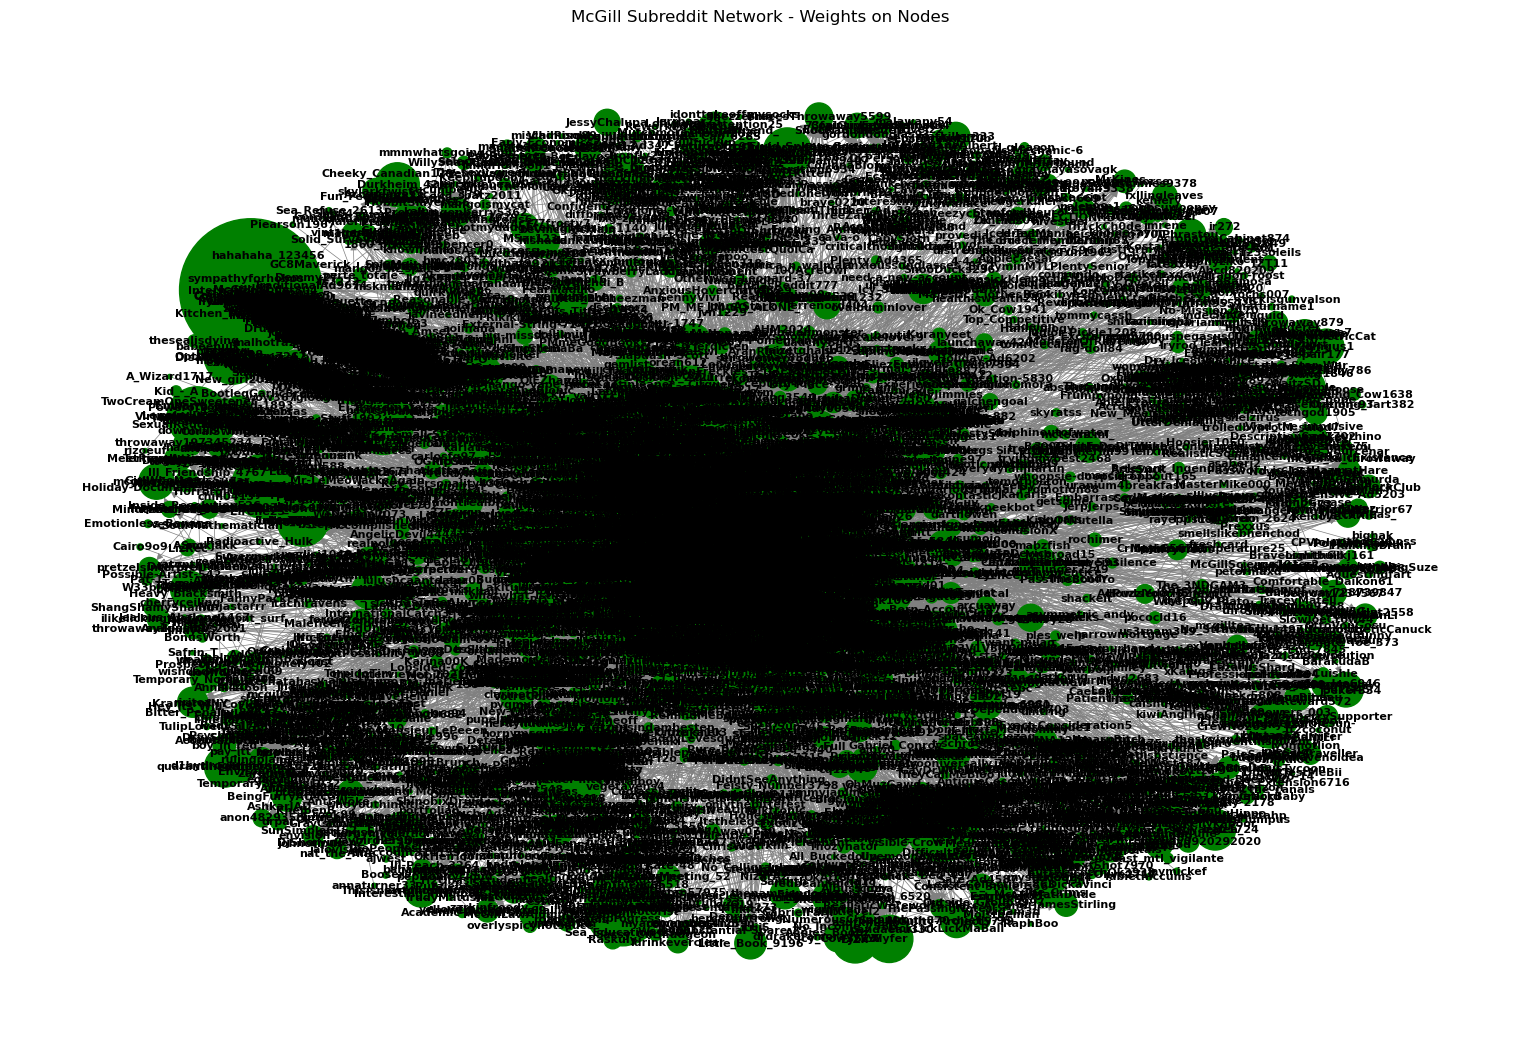

In [14]:
# Visualize the graph with weights on nodes and constant width on edges
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_reddit)
nx.draw(G_reddit, pos, with_labels=True, node_color='green', node_size=node_sizes, font_size=8, font_color='black', font_weight='bold', width=edge_widths, edge_color='gray')
plt.title('McGill Subreddit Network - Weights on Nodes')
plt.show()

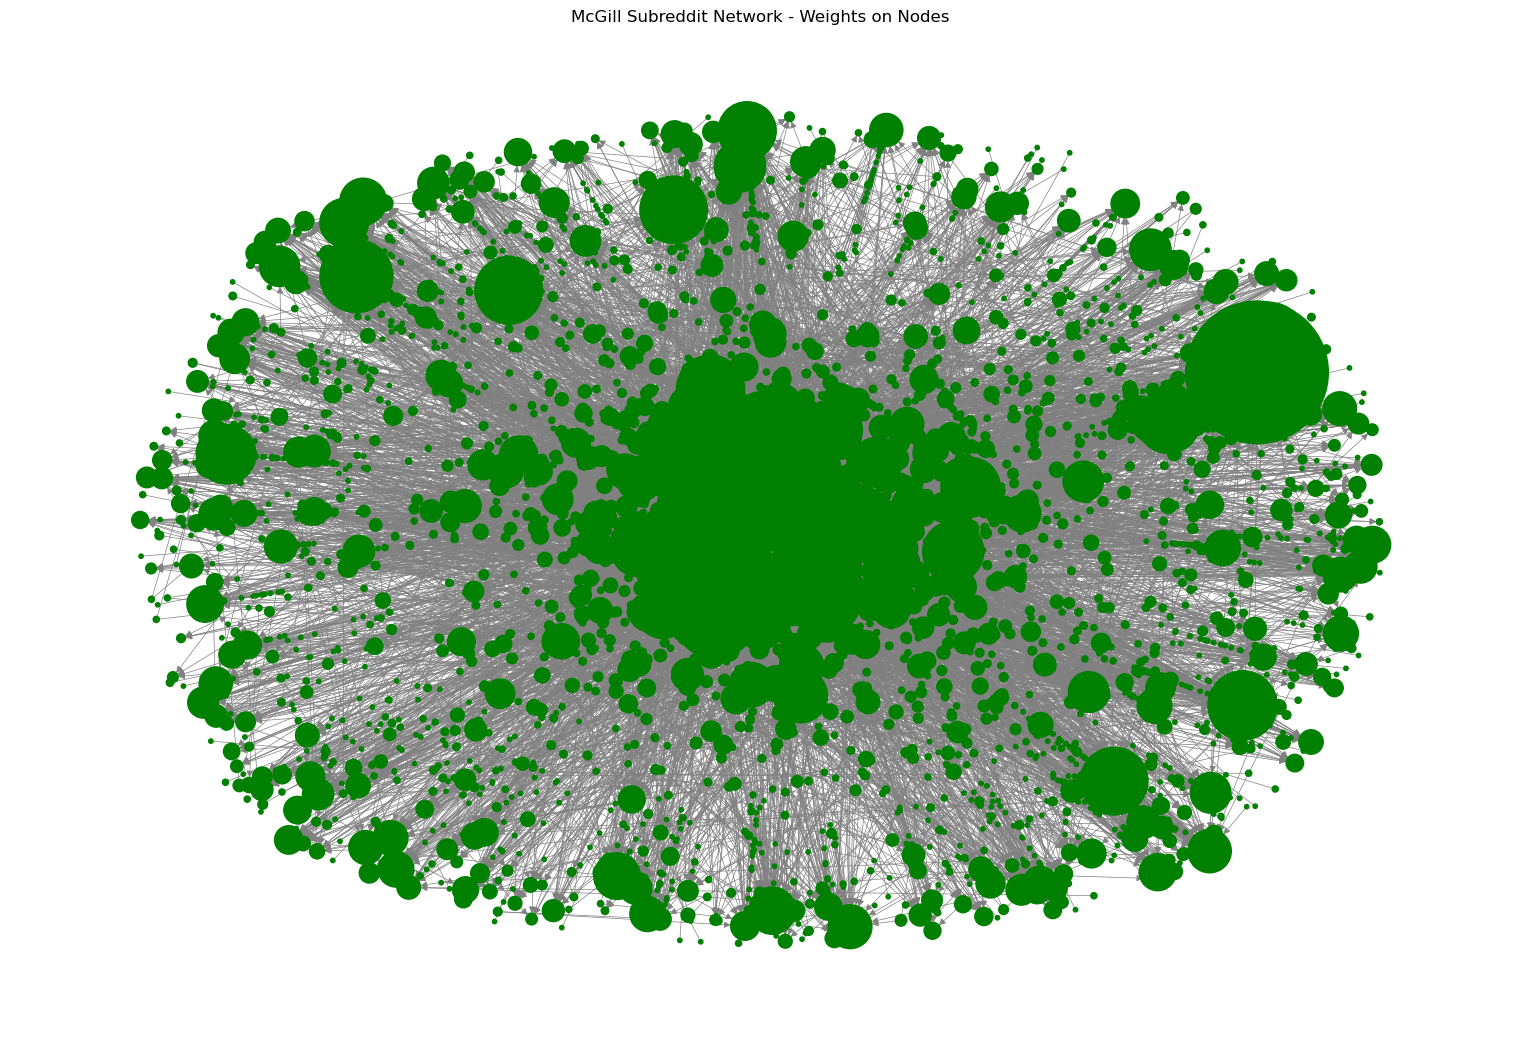

In [15]:
# Visualize the graph with weights on nodes and constant width on edges
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_reddit)
nx.draw(G_reddit, pos, with_labels=False, node_color='green', node_size=node_sizes, font_size=8, font_color='black', font_weight='bold', width=edge_widths, edge_color='gray')
plt.title('McGill Subreddit Network - Weights on Nodes')
plt.show()

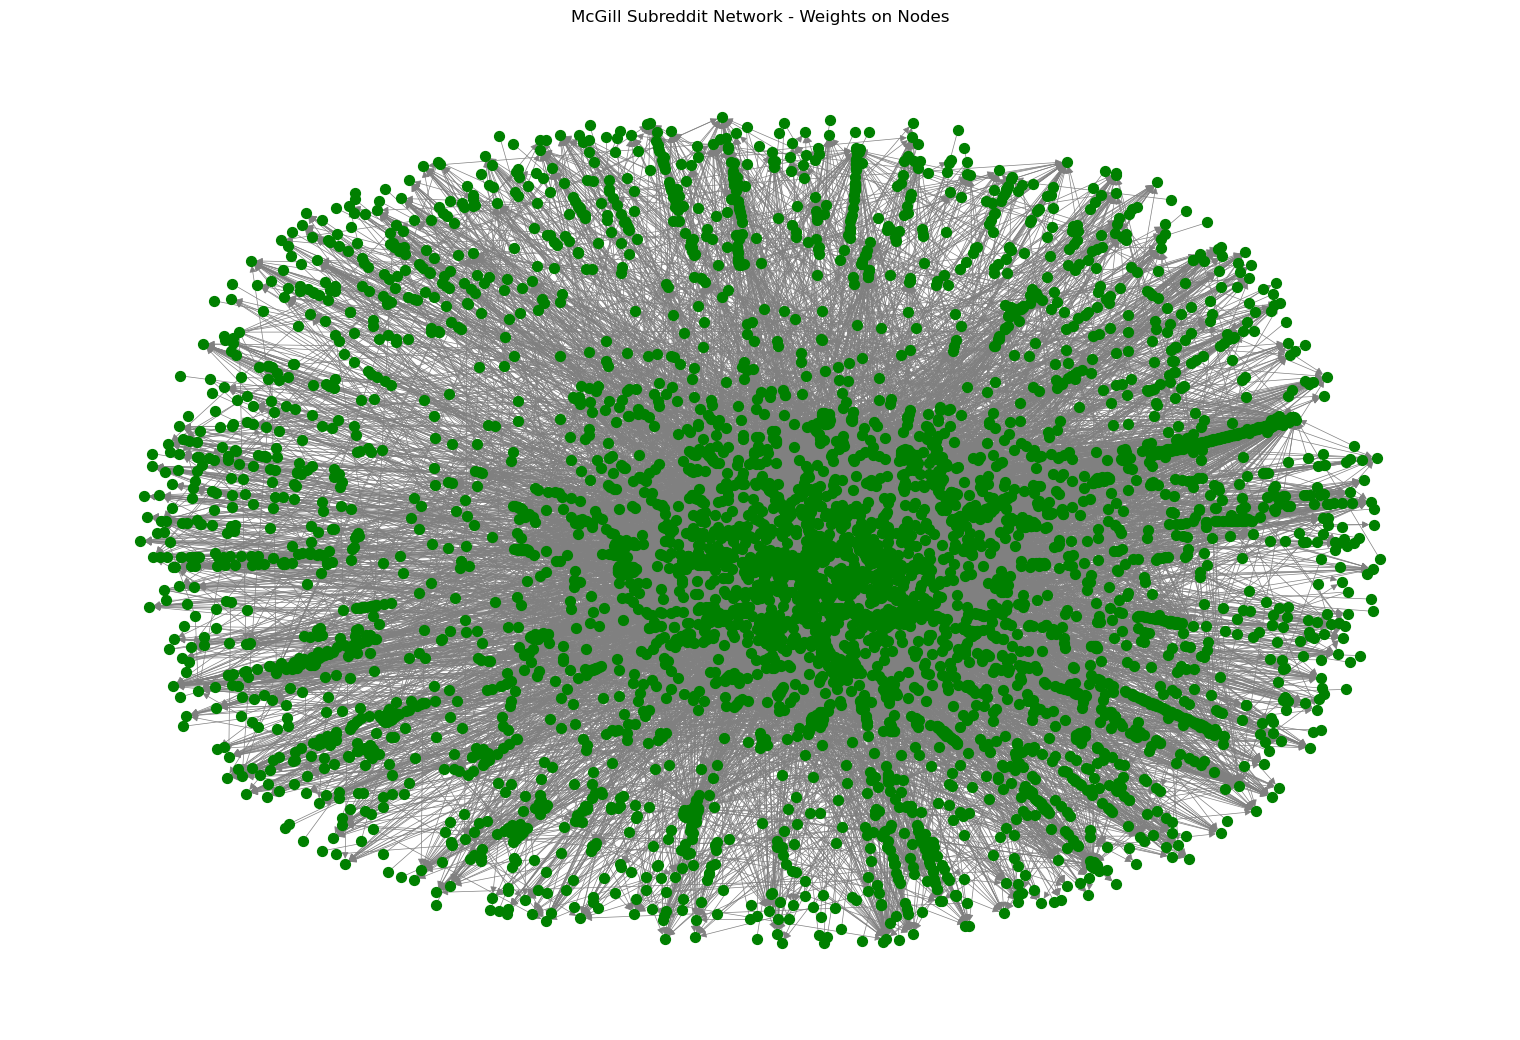

In [16]:
# Visualize the graph with weights on nodes and constant width on edges
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_reddit)
nx.draw(G_reddit, pos, with_labels=False, node_color='green', node_size=50, font_size=8, font_color='black', font_weight='bold', width=edge_widths, edge_color='gray')
plt.title('McGill Subreddit Network - Weights on Nodes')
plt.show()

# Statidistics of the network

In [17]:
def analyze_network(network, directed=False):
    # Number of nodes
    N = network.number_of_nodes()

    # Number of links
    L = network.number_of_edges()

    # Density
    d = nx.density(network)

    # Average Degree
    if directed:
        k_in = sum(dict(network.in_degree()).values()) / float(N)
        k_out = sum(dict(network.out_degree()).values()) / float(N)
        k_avg = (k_in, k_out)
    else:
        k_avg = sum(dict(network.degree()).values()) / float(N)

    # Clustering Coefficient
    if directed:
        CC = nx.average_clustering(network.to_undirected())
    else:
        CC = nx.average_clustering(network)

    return {
        "Number of Nodes": N,
        "Number of Links": L,
        "Density": d,
        "Average Degree": k_avg,
        "Clustering Coefficient": CC
    }
    
# Analyze the network
network_stats = analyze_network(G_reddit, directed=True)
network_stats


{'Number of Nodes': 6062,
 'Number of Links': 14630,
 'Density': 0.0003981842796846381,
 'Average Degree': (2.4133949191685913, 2.4133949191685913),
 'Clustering Coefficient': 0.03473841428804732}

# Centrality measures


## Degree centrality

In [ ]:
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G_reddit)

# Print Degree Centrality values
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")


In [20]:
# Identify the most important nodes
most_important_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("\nMost Important Nodes based on Degree Centrality:")
for node in most_important_nodes:
    print(f"Node {node}: {degree_centrality[node]}")





Most Important Nodes based on Degree Centrality:
Node McGill-Mods: 0.08546444481108728
Node Razwog: 0.06319089259198152
Node Thermidorien: 0.05989110707803993
Node nebraska7064: 0.03118297310674806
Node 0ajs0jas: 0.03101798383105098
Node alah123: 0.030688005279656823
Node Task1337: 0.027388219765715226
Node gang2018: 0.02474839135456195
Node BeautyInUgly: 0.024088434251773636
Node NoBrightFutureForMe: 0.022933509321894075


In [21]:
#highest degree centrality
highest_degree_centrality = max(degree_centrality, key=degree_centrality.get)
highest_degree_centrality_value = degree_centrality[highest_degree_centrality]
highest_degree_centrality, highest_degree_centrality_value




('McGill-Mods', 0.08546444481108728)

## Closeness centrality

In [ ]:

closeness_centrality = nx.closeness_centrality(G_reddit)

# Print Closeness Centrality values
print("Closeness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")
    

    


In [23]:
# Identify the most important nodes based on Closeness Centrality
most_important_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]
print("\nMost Important Nodes based on Closeness Centrality:")
for node in most_important_nodes:
    print(f"Node {node}: {closeness_centrality[node]}")


Most Important Nodes based on Closeness Centrality:
Node McGill-Mods: 0.2548048949164096
Node Razwog: 0.23797964498814272
Node Thermidorien: 0.22840276715346836
Node BeautyInUgly: 0.21941346402143852
Node Giant_Lemon2022: 0.21519335483556382
Node Task1337: 0.21042914260900616
Node gang2018: 0.20983348766506987
Node NoBrightFutureForMe: 0.20981992751274375
Node nebraska7064: 0.20924520606486313
Node nosybeer: 0.2069320040650246


In [24]:
#highest closeness centrality
highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)
highest_closeness_centrality_value = closeness_centrality[highest_closeness_centrality]
highest_closeness_centrality, highest_closeness_centrality_value


('McGill-Mods', 0.2548048949164096)

## Betweenness centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G_reddit)

# Imprimir los valores de centralidad de intermediación
print("Betweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")



In [26]:
# Identificar los nodos más importantes basados en la centralidad de intermediación
most_important_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
print("\nMost Important Nodes based on Betweenness Centrality:")
for node in most_important_nodes_betweenness:
    print(f"Node {node}: {betweenness_centrality[node]}")


Most Important Nodes based on Betweenness Centrality:
Node Razwog: 0.016396943114966363
Node Thermidorien: 0.01381012091726169
Node Task1337: 0.005280867440782154
Node nebraska7064: 0.004430288276581932
Node alah123: 0.004207716892325207
Node usa1774: 0.004000589508513979
Node KeyRepair4: 0.003338147368369678
Node updog_nothing_much: 0.0029769771162605646
Node haxon42: 0.0028772855299954905
Node _Archelon_: 0.002683913445534644


In [27]:
#highest betweenness centrality
highest_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)
highest_betweenness_centrality_value = betweenness_centrality[highest_betweenness_centrality]
highest_betweenness_centrality, highest_betweenness_centrality_value


('Razwog', 0.016396943114966363)

##  Eigenvector centrality

In [ ]:
# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G_reddit)

# Print Eigenvector Centrality values
print("Eigenvector Centrality:")

for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")
    
     





In [5]:
# Identify the most important nodes based on Eigenvector Centrality
most_important_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:10]
print("\nMost Important Nodes based on Eigenvector Centrality:")
for node in most_important_nodes:
    print(f"Node {node}: {eigenvector_centrality[node]}")
    



Most Important Nodes based on Eigenvector Centrality:
Node Razwog: 0.2929266146717705
Node Thermidorien: 0.23650216363219473
Node McGill-Mods: 0.21447933400702604
Node BeautyInUgly: 0.1734905635007494
Node alah123: 0.13556249239037582
Node Task1337: 0.13249015605916042
Node nebraska7064: 0.13112327433126322
Node gang2018: 0.1305108429375764
Node Giant_Lemon2022: 0.12871210727044083
Node haxon42: 0.12646068179385875


In [30]:
#highest eigenvector centrality
highest_eigenvector_centrality = max(eigenvector_centrality, key=eigenvector_centrality.get)
highest_eigenvector_centrality_value = eigenvector_centrality[highest_eigenvector_centrality]
highest_eigenvector_centrality, highest_eigenvector_centrality_value

('Razwog', 0.2929266146717705)

# Community detection

In [38]:
G_undirected = G_reddit.to_undirected()

In [39]:


from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G_undirected))

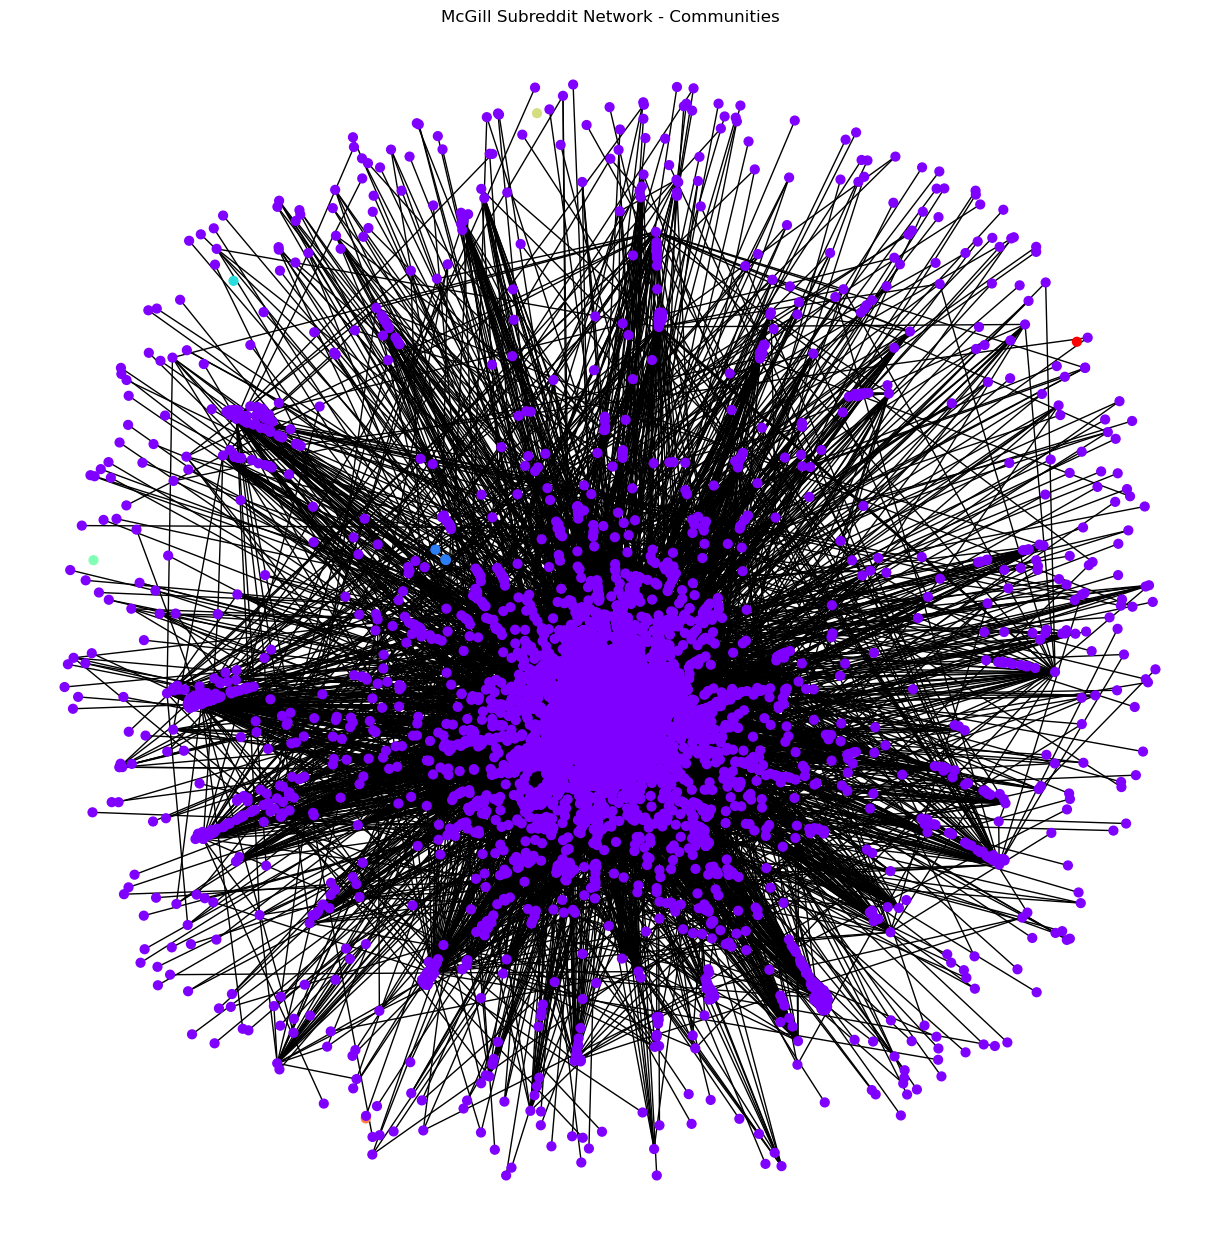

Community 0: frozenset({'mabzfish', 'YouRustleMyJimmies', 'saber202020', 'Playful-Unicorn', 'GoddamnWateryOatmeal', 'clarinetpjp', 'Han-Solo_Burger', 'Sceptical-Chymist', 'redheadsmurf', '37Exxon', 'bardnon', 'Outside_Group9997', 'AngelicDevil4444', 'Willing_Gur_1838', 'Holiday_Fail_5089', 'DaddyLevesque', 'kubaaaa718', 'MarryMeLouigiBerry', 'idefyphysics12', '8131snake', 'trippingupstairss', 'vchaoticneutral', 'botanybud', 'Deep-Victory-1520', 'Dollamlg', 'dark_rug', 'lotion_is_life', 'UBC-Believer', 'John3192', 'Halfjack12', 'stbv', 'fluffy_seaotter', 'ReverseCaptioningBot', 'DinoLam2000223', 'litocam', 'Ours_Polare', 'tildergut', 'IrisEver', 'Norepinphrine', 'alexstathis', 'Abudddy', 'SouthernAd8931', 'Alphaaa23', 'prosting1', 'samumuxd', 'richbenrob55', 'wintersnow1', 'joebamainnirvana', 'Mastafia', 'Claim-Mindless', 'YourGrannysBF', 'stones01930', 'Fabulous_Claim7594', 'Able-Consideration92', 'BILA80110201', 'MaximumTemperature25', 'egalois20', 'Luluu420', 'kutchyose_no_ibrahim', 

0.00019622423076875016

In [44]:
# Create a dictionary to store the community index for each node
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

#visualization of the communities
pos = nx.spring_layout(G_undirected)
plt.figure(figsize=(12, 12))

colors = [node_community[node] for node in G_undirected.nodes()]
nx.draw(G_undirected, pos, node_color=colors, with_labels=False, node_size=40, cmap=plt.cm.rainbow)
plt.title("McGill Subreddit Network - Communities")
plt.show()

# Print the communities
for i, community in enumerate(communities):
    print(f"Community {i}: {community}")
    
# Calculate the modularity of the network
modularity = nx.algorithms.community.modularity(G_undirected, communities)
modularity



# Link Prediction

In [18]:
predicted_links = {
    'Jaccard Coefficient': list(nx.jaccard_coefficient(G_reddit.to_undirected())),
    'Resource Allocation Index': list(nx.resource_allocation_index(G_reddit.to_undirected())),
    'Adamic Adar Index': list(nx.adamic_adar_index(G_reddit.to_undirected())),
    'Preferential Attachment': list(nx.preferential_attachment(G_reddit.to_undirected()))
}

In [20]:
# Function to visualize predicted links
def visualize_predicted_links(G, pos, predicted, title):
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=False, node_color='green', node_size=50, font_size=8, font_color='black', font_weight='bold', width=2, edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=predicted, edge_color='r', width=2)
    plt.title(title)
    plt.show()
    



In [21]:
# Get the top predicted links for each method
top_predicted_links = {}

for method, links in predicted_links.items():
    sorted_links = sorted(links, key=lambda x: x[2], reverse=True)
    top_predicted_links[method] = sorted_links[:10]

# Print the top predicted links for each method
for method, links in top_predicted_links.items():
    print(f"Top Predicted Links for {method}:")
    for link in links:
        node1, node2, value = link
        print(f"{node1} - {node2}: {value}")

Top Predicted Links for Jaccard Coefficient:
basicfirstacct - BigBoyJakoo: 1.0
basicfirstacct - assumesphericalcow: 1.0
basicfirstacct - Generic_Reddit_Bot: 1.0
basicfirstacct - Fuzzzy-Bumblebee: 1.0
Notarussianbot42069 - BurntGhostyToasty: 1.0
Notarussianbot42069 - Noderoni: 1.0
Notarussianbot42069 - Benjazzi: 1.0
Notarussianbot42069 - DueFigure899: 1.0
Notarussianbot42069 - winnilourson: 1.0
Notarussianbot42069 - SlowJoeCrow44: 1.0
Top Predicted Links for Resource Allocation Index:
Boingusbinguswingus - 0ajs0jas: 4.389954073311014
ThatLocalLad - 0ajs0jas: 3.1623156198104914
alah123 - McGill-Mods: 2.7772820584977063
Historical-Finger250 - dilfybro: 2.6141021472600423
KeyRepair4 - ThatLocalLad: 2.4849605473467236
TopChrono - Task1337: 2.3041507483110335
ThatLocalLad - NoBrightFutureForMe: 2.2102534927483646
gang2018 - McGill-Mods: 2.0292051026826545
Ghostofgeoffrey - McGill-Mods: 2.0198465130672845
KeyRepair4 - Boingusbinguswingus: 1.9503454659604709
Top Predicted Links for Adamic Adar

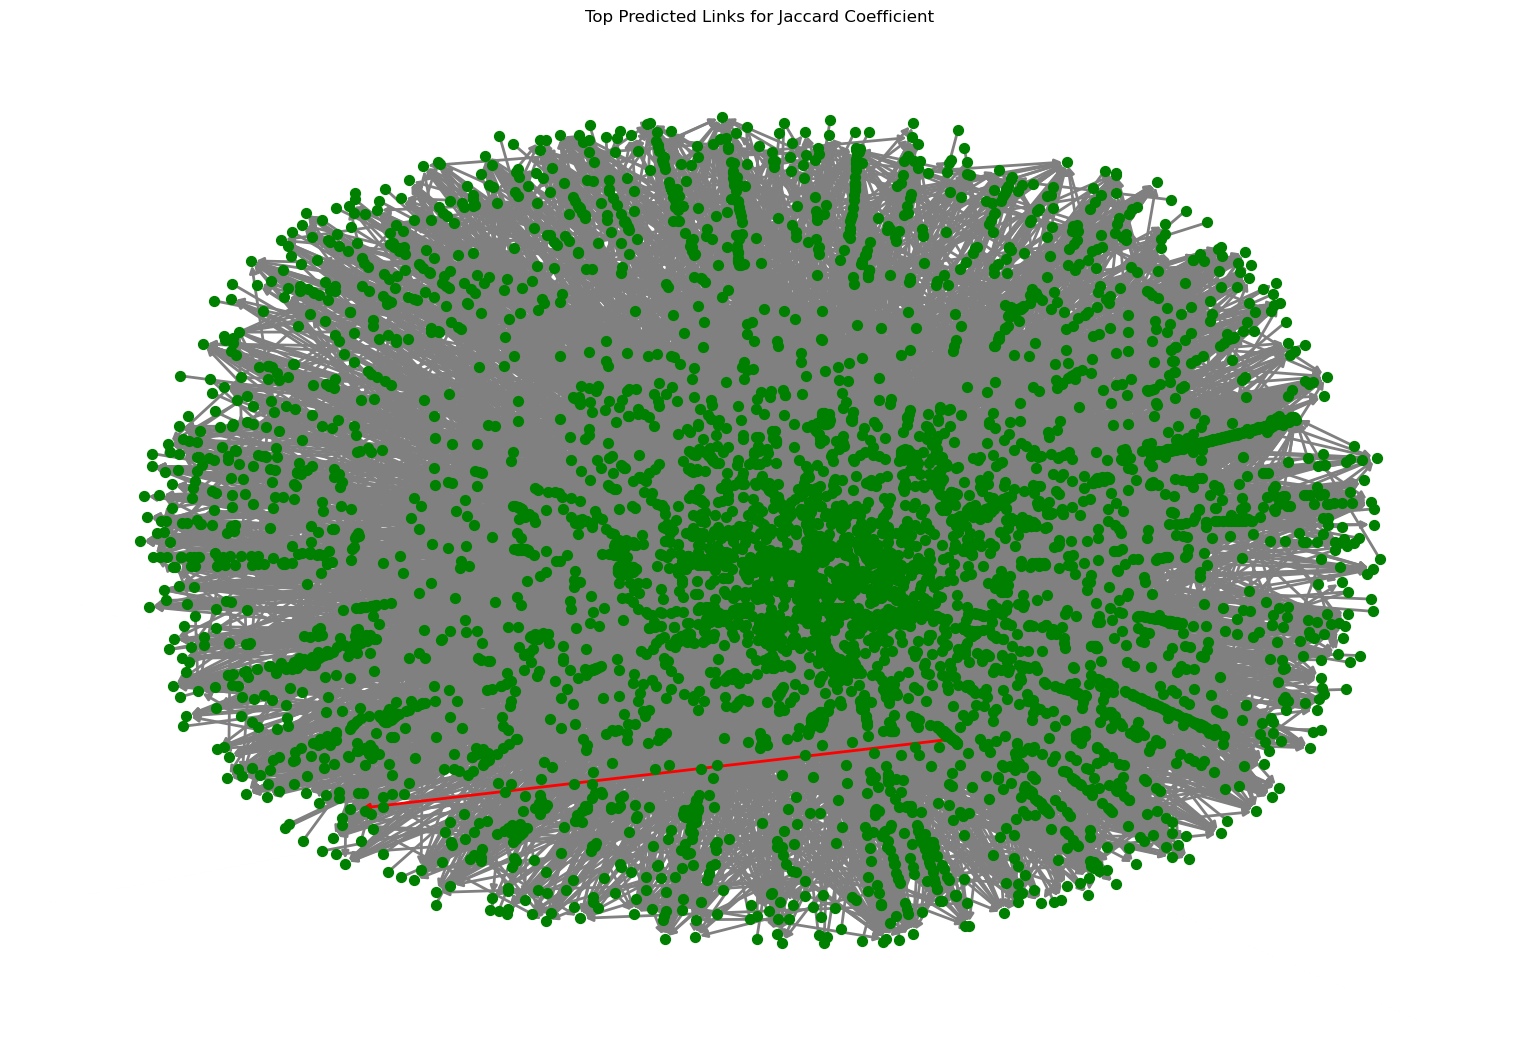

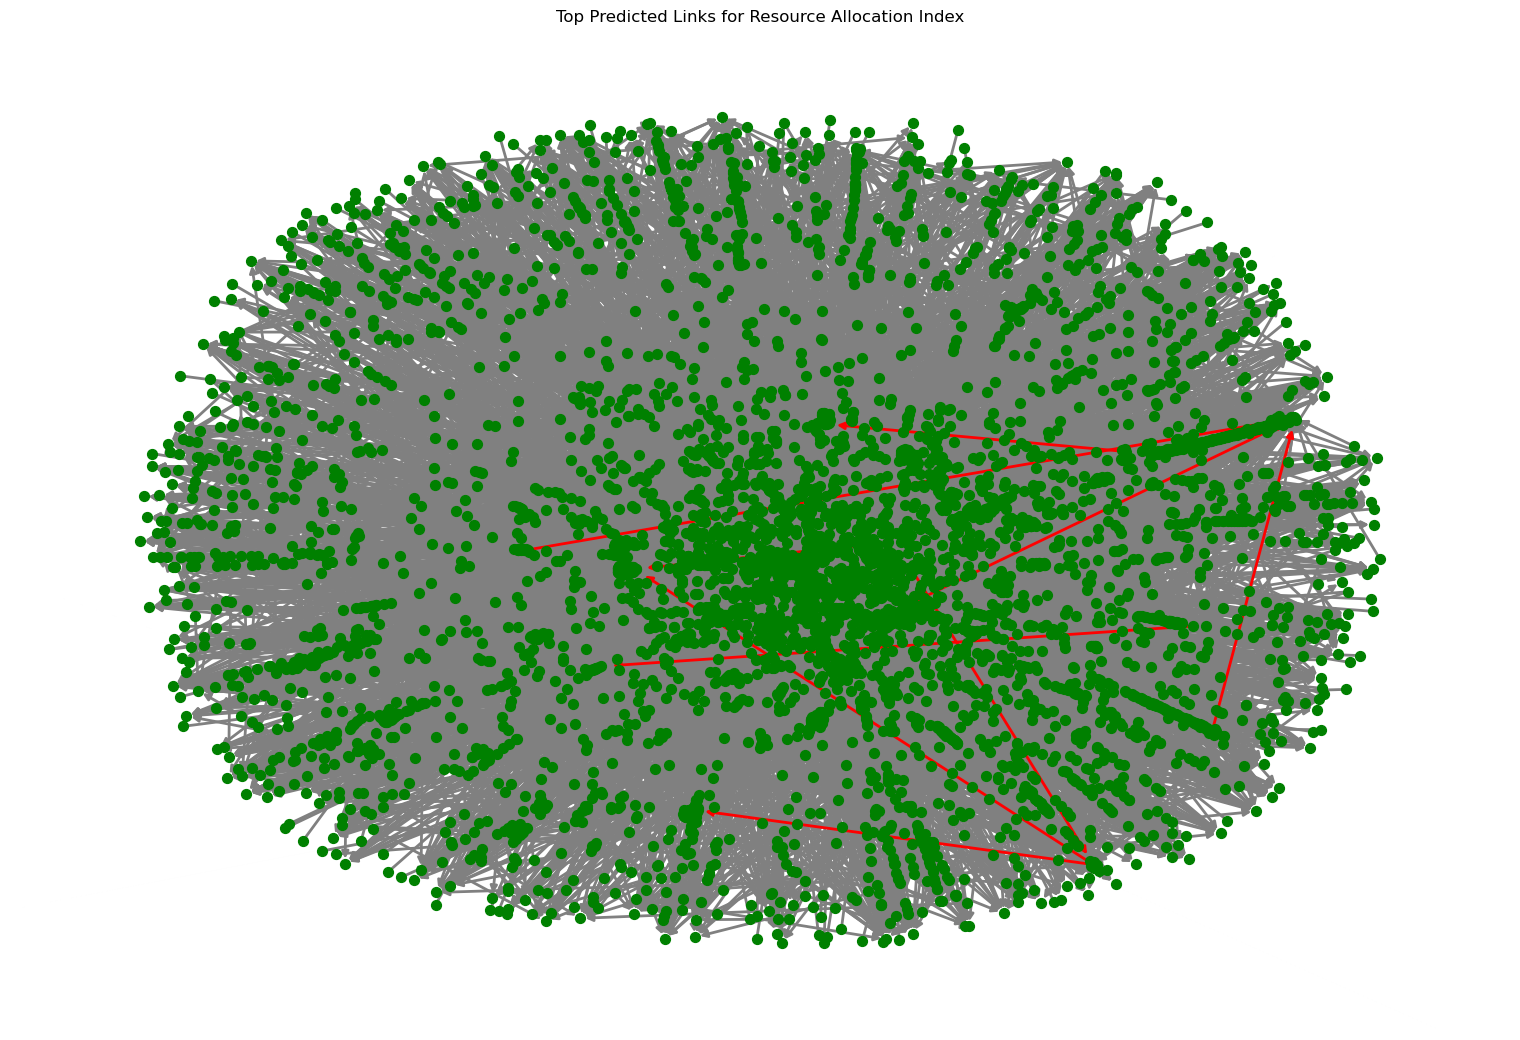

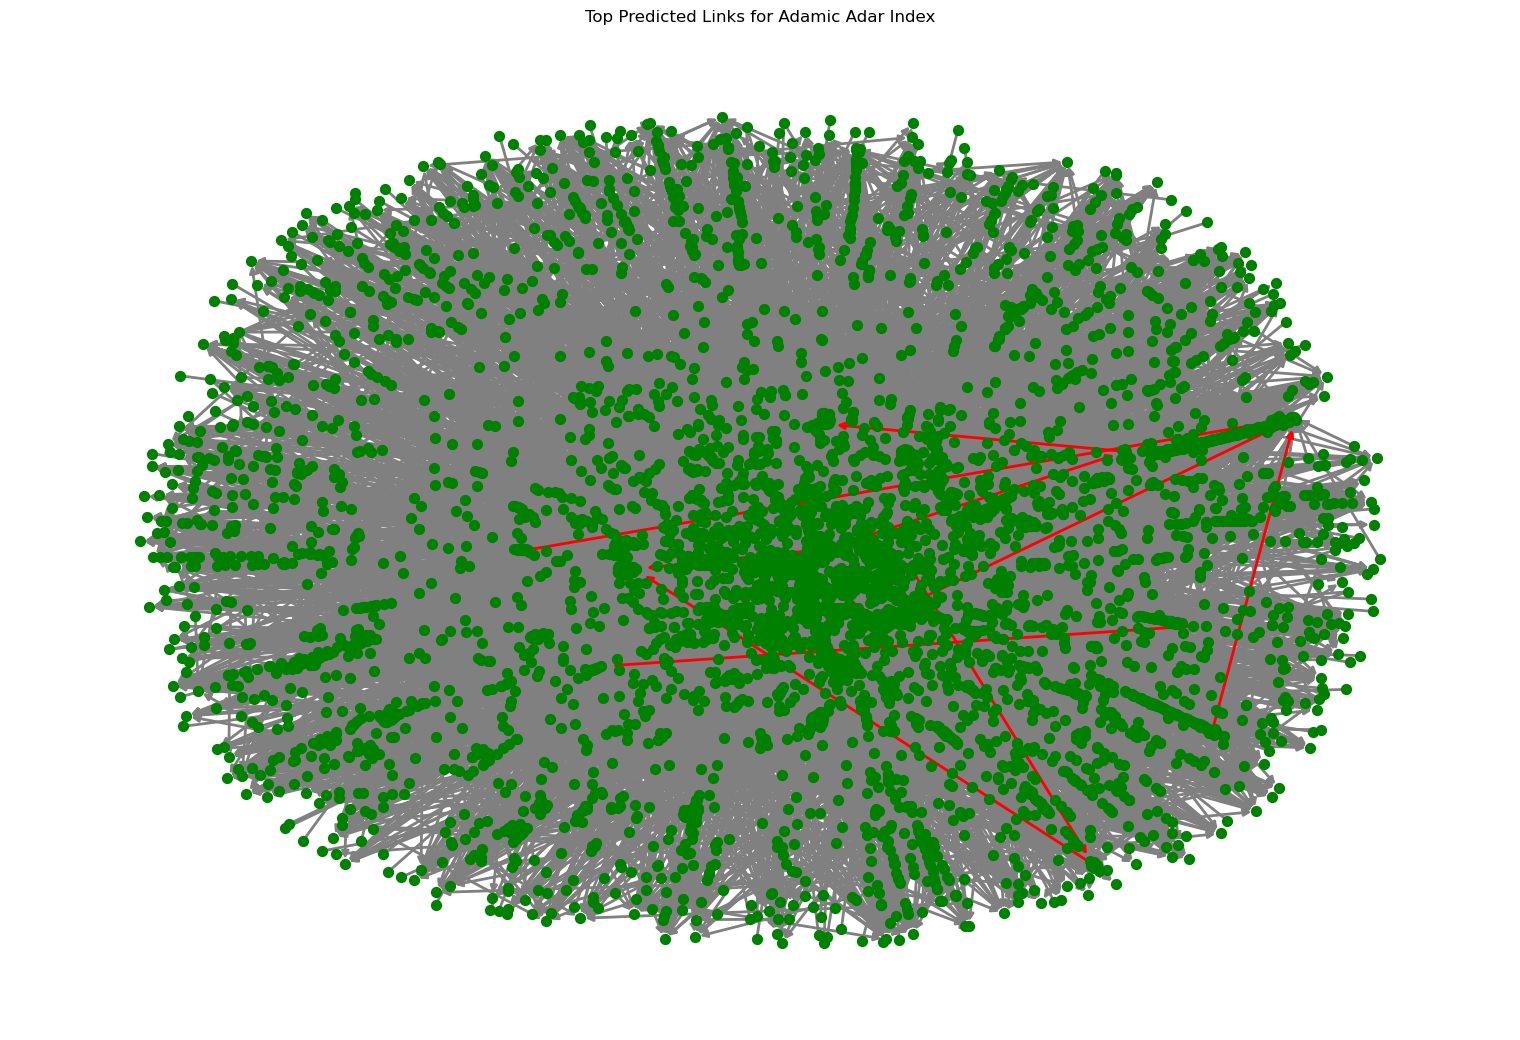

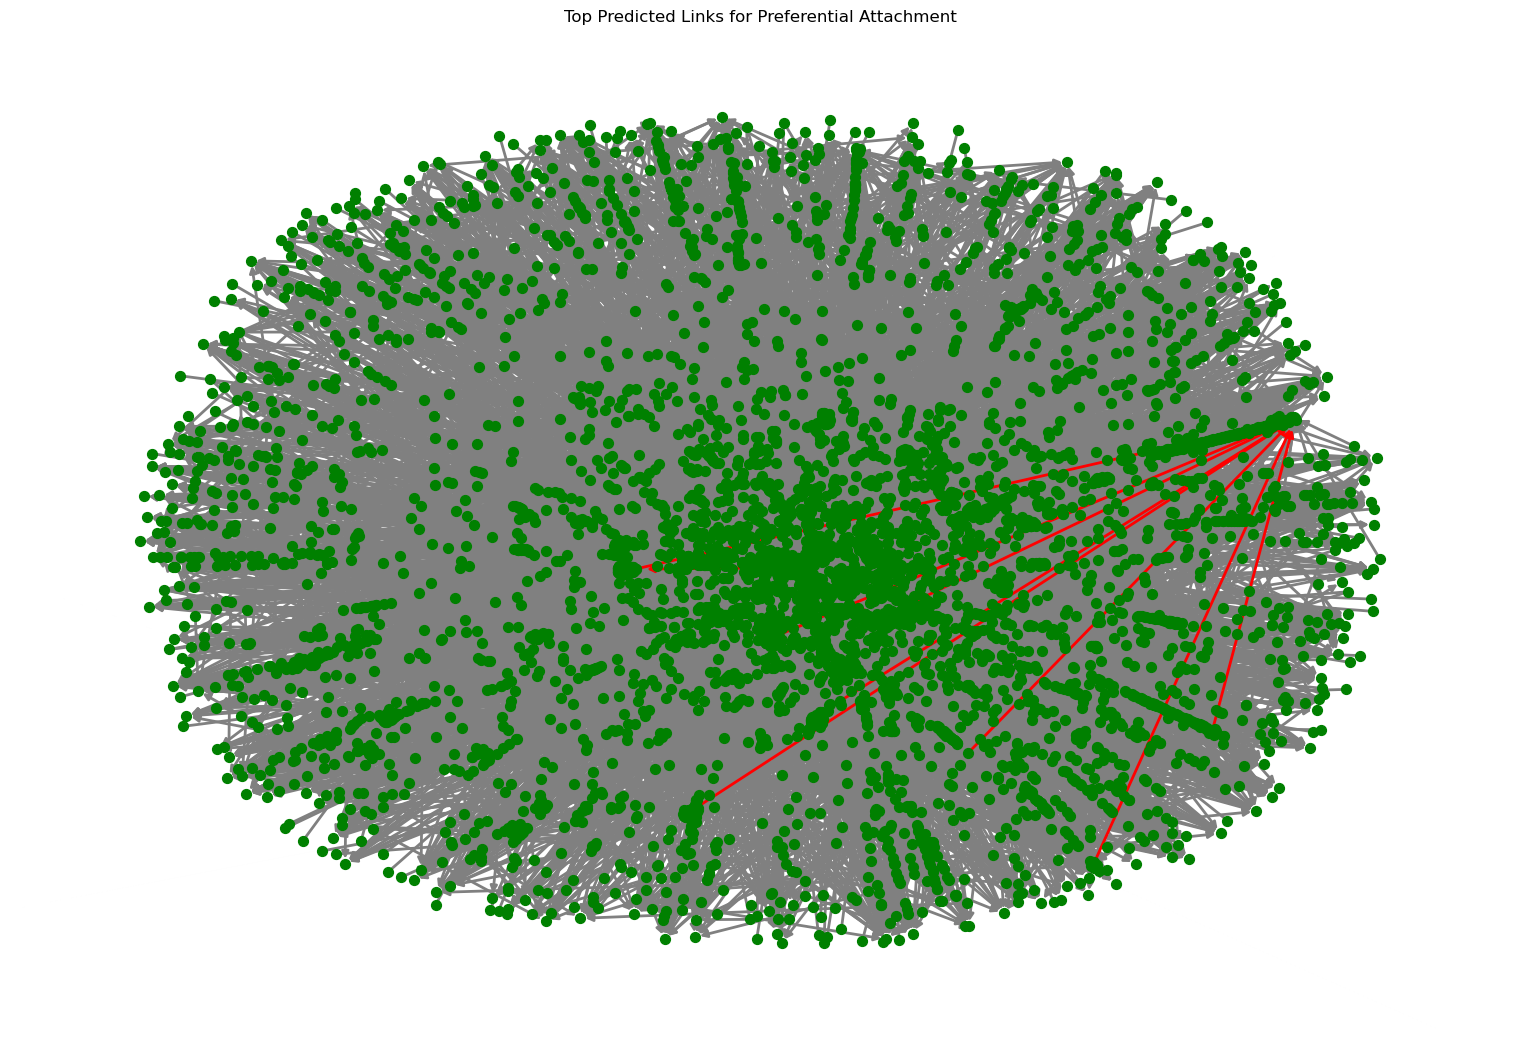

In [22]:


# Visualize the predicted links for each metric
for metric, links in predicted_links.items():
    # Get the top 10 predicted links
    top_links = sorted(links, key=lambda x: x[2], reverse=True)[:10]
    # Extract the node pairs
    top_edges = [(u, v) for u, v, p in top_links]
    visualize_predicted_links(G_reddit, pos, top_edges, f"Top Predicted Links for {metric}")